# Regressão Linear

In [1]:
# Configuração Inicial
import os
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

In [2]:
# Configurações de exibição
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 100)
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)
%matplotlib inline

In [3]:
# Configuração de caminhos
PROJECT_ROOT = Path().resolve().parent
DATA_DIR = PROJECT_ROOT / 'data' / 'raw'

In [4]:
# Adiciona o diretório raiz ao path do Python
if str(PROJECT_ROOT) not in sys.path:
    sys.path.append(str(PROJECT_ROOT))

In [5]:
# Importação das funções personalizadas
from uteis.preprocessing import (
    carregar_dados, analisar_dados, analisar_valores_ausentes,
    preencher_valores_numericos, converter_categorias, dividir_dados, salvar_dados
)

print(f"Configuração concluída! Diretório do projeto: {PROJECT_ROOT}")

Configuração concluída! Diretório do projeto: D:\ProjetosGit\kaggle-regression-lab


## Carregamento dos Dados

In [ ]:
# Carregamento dos Dados
caminho_dados = DATA_DIR / 'train.csv'
df = carregar_dados(caminho_dados)

Carregando dados de treino...


In [7]:
# Análise inicial
print("\nVisão inicial dos dados:")
display(df.head(3))
print(f"\nDimensões do dataset: {df.shape}")
print("\nTipos de dados:")
print(df.dtypes.value_counts())


Visão inicial dos dados:


Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1         Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     2Story            7            5       2003   
1       Norm     1Fam     1Story            6            8       1976   
2       Norm     1Fam     2Story            7            5       2001   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          2003     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1          1976     Gable  CompShg     MetalSd     MetalSd        NaN   
2          2002     Gable  CompShg     VinylSd     VinylSd    BrkFace   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0       196.0        Gd        TA      PConc       Gd       TA           No   
1         0.0        TA        TA     CBlock       Gd       TA           Gd   
2       162.0        Gd        TA      PConc       Gd       TA           Mn   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          GLQ         706          Unf           0        150          856   
1          ALQ         978          Unf           0        284         1262   
2          GLQ         486          Unf           0        434          920   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        Ex          Y      SBrkr       856       854             0   
1    GasA        Ex          Y      SBrkr      1262         0             0   
2    GasA        Ex          Y      SBrkr       920       866             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0       1710             1             0         2         1             3   
1       1262             0             1         2         0             3   
2       1786             1             0         2         1             3   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          Gd             8        Typ           0         NaN   
1             1          TA             6        Typ           1          TA   
2             1          Gd             6        Typ           1          TA   

  GarageType  GarageYrBlt GarageFinish  GarageCars  GarageArea GarageQual  \
0     Attchd       2003.0          RFn           2         548         TA   
1     Attchd       1976.0          RFn           2         460         TA   
2     Attchd       2001.0          RFn           2         608         TA   

  GarageCond PavedDrive  WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  \
0         TA          Y           0           61              0          0   
1         TA          Y         298            0              0          0   
2         TA          Y           0           42              0          0   

   ScreenPorch  PoolArea PoolQC Fence MiscFeature  MiscVal  MoSold  YrSold  \
0            0         0    NaN   NaN         NaN        0       2    2008   
1            0         0    NaN   NaN         NaN        0       5    2007   
2            0         0    NaN   NaN         NaN        0       9    2008   

  SaleType SaleCondition  SalePrice  
0       WD        Normal     208500  
1       WD        Normal     181500  
2       WD        Normal     223500


Dimensões do dataset: (1460, 81)

Tipos de dados:
object     43
int64      35
float64     3
Name: count, dtype: int64


## Análise de Valores Ausentes

Analisando valores ausentes...

ANÁLISE DE VALORES AUSENTES

Visão Geral:
- Total de linhas: 1460
- Total de colunas: 81
- Colunas com valores ausentes: 19 (23.5% do total)

Detalhes dos Valores Ausentes:



Análise por Tipo de Dado:


int64         0
float64     348
object     7481
dtype: int64


Recomendações:

1. Considerar remover as seguintes colunas (mais de 30.0% de valores ausentes):
   - PoolQC (99.5% ausentes)
   - MiscFeature (96.3% ausentes)
   - Alley (93.8% ausentes)
   - Fence (80.8% ausentes)
   - MasVnrType (59.7% ausentes)
   - FireplaceQu (47.3% ausentes)

2. Para as demais colunas, considere:
   - Para colunas numéricas: preencher com mediana ou média
   - Para colunas categóricas: criar categoria 'Desconhecido' ou usar a moda


D:\ProjetosGit\kaggle-regression-lab\uteis\preprocessing.py:124: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=missing_gt_limit.index,


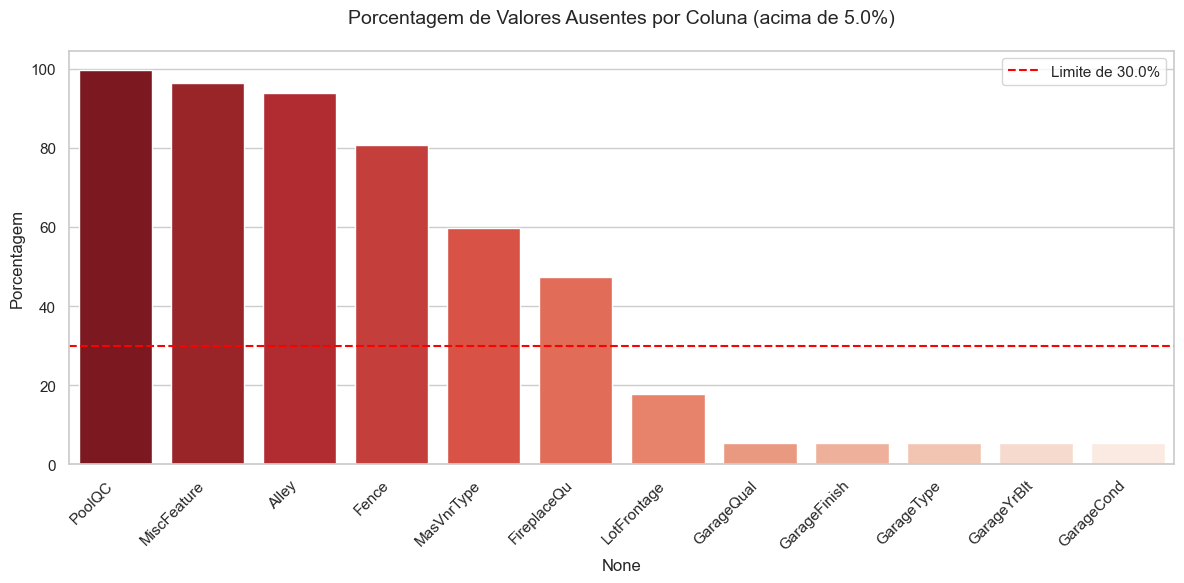

In [ ]:
# Análise de Valores Ausentes
missing_data = analisar_valores_ausentes(
    df,
    limite_porcentagem=30.0,  # Considerar remoção acima de 30% de valores ausentes
    plotar_grafico=True,      # Mostrar gráfico
    limite_grafico=5.0        # Mostrar no gráfico apenas colunas com mais de 5% de valores ausentes
)

## Análise da Variável Alvo (SalePrice)

In [ ]:
# Criar figura com subplots
plt.figure(figsize=(18, 6))

ANÁLISE DA VARIÁVEL ALVO (SalePrice)


<Figure size 1800x600 with 0 Axes>

<Figure size 1800x600 with 0 Axes>

Text(0, 0.5, 'Frequência')

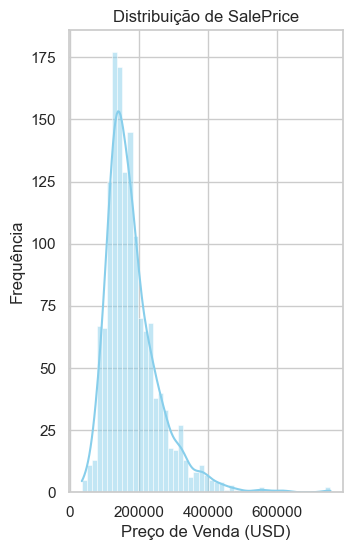

In [11]:
# Gráfico 1: Histograma
plt.subplot(1, 3, 1)
sns.histplot(df['SalePrice'], kde=True, color='skyblue')
plt.title('Distribuição de SalePrice')
plt.xlabel('Preço de Venda (USD)')
plt.ylabel('Frequência')

Text(0, 0.5, 'Preço de Venda (USD)')

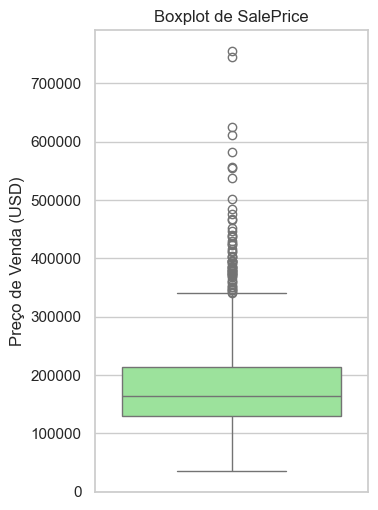

In [12]:
# Gráfico 2: Boxplot
plt.subplot(1, 3, 2)
sns.boxplot(y=df['SalePrice'], color='lightgreen')
plt.title('Boxplot de SalePrice')
plt.ylabel('Preço de Venda (USD)')

Text(0.5, 1.0, 'QQ-Plot de SalePrice')

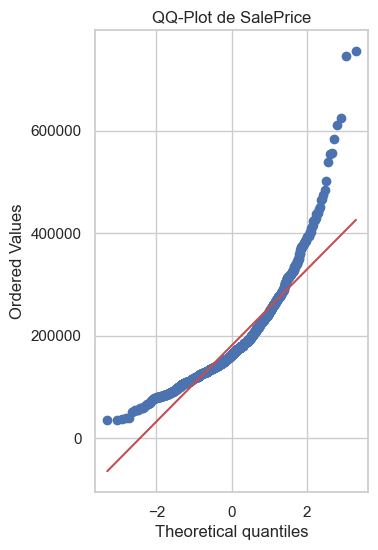

In [13]:
# Gráfico 3: QQ-Plot para normalidade
plt.subplot(1, 3, 3)
import scipy.stats as stats
stats.probplot(df['SalePrice'], plot=plt)
plt.title('QQ-Plot de SalePrice')

In [14]:
plt.tight_layout()
plt.show()

<Figure size 1200x600 with 0 Axes>

In [ ]:
# Estatísticas descritivas
display(df['SalePrice'].describe().to_frame().T)


Estatísticas Descritivas de SalePrice:


count          mean           std      min       25%       50%  \
SalePrice  1460.0  180921.19589  79442.502883  34900.0  129975.0  163000.0   

                75%       max  
SalePrice  214000.0  755000.0

In [17]:
# Identificação de outliers usando o método IQR
Q1 = df['SalePrice'].quantile(0.25)
Q3 = df['SalePrice'].quantile(0.75)
IQR = Q3 - Q1
limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR

outliers = df[(df['SalePrice'] < limite_inferior) | (df['SalePrice'] > limite_superior)]
print(f"\nNúmero de outliers identificados: {len(outliers)} ({(len(outliers)/len(df))*100:.2f}% dos dados)")


Número de outliers identificados: 61 (4.18% dos dados)


In [18]:
# Análise de normalidade
from scipy import stats
stat, p_valor = stats.shapiro(df['SalePrice'].sample(min(5000, len(df))))

print("\nTeste de Normalidade (Shapiro-Wilk):")
print(f"Estatística do teste: {stat:.4f}")
print(f"Valor-p: {p_valor:.4f}")
print("Conclusão: Distribuição NÃO normal" if p_valor < 0.05 else "Conclusão: Distribuição normal")


Teste de Normalidade (Shapiro-Wilk):
Estatística do teste: 0.8697
Valor-p: 0.0000
Conclusão: Distribuição NÃO normal


## Análise das Variáveis Numéricas

In [20]:
# Selecionar apenas colunas numéricas
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
df_numeric = df[numeric_cols].copy()

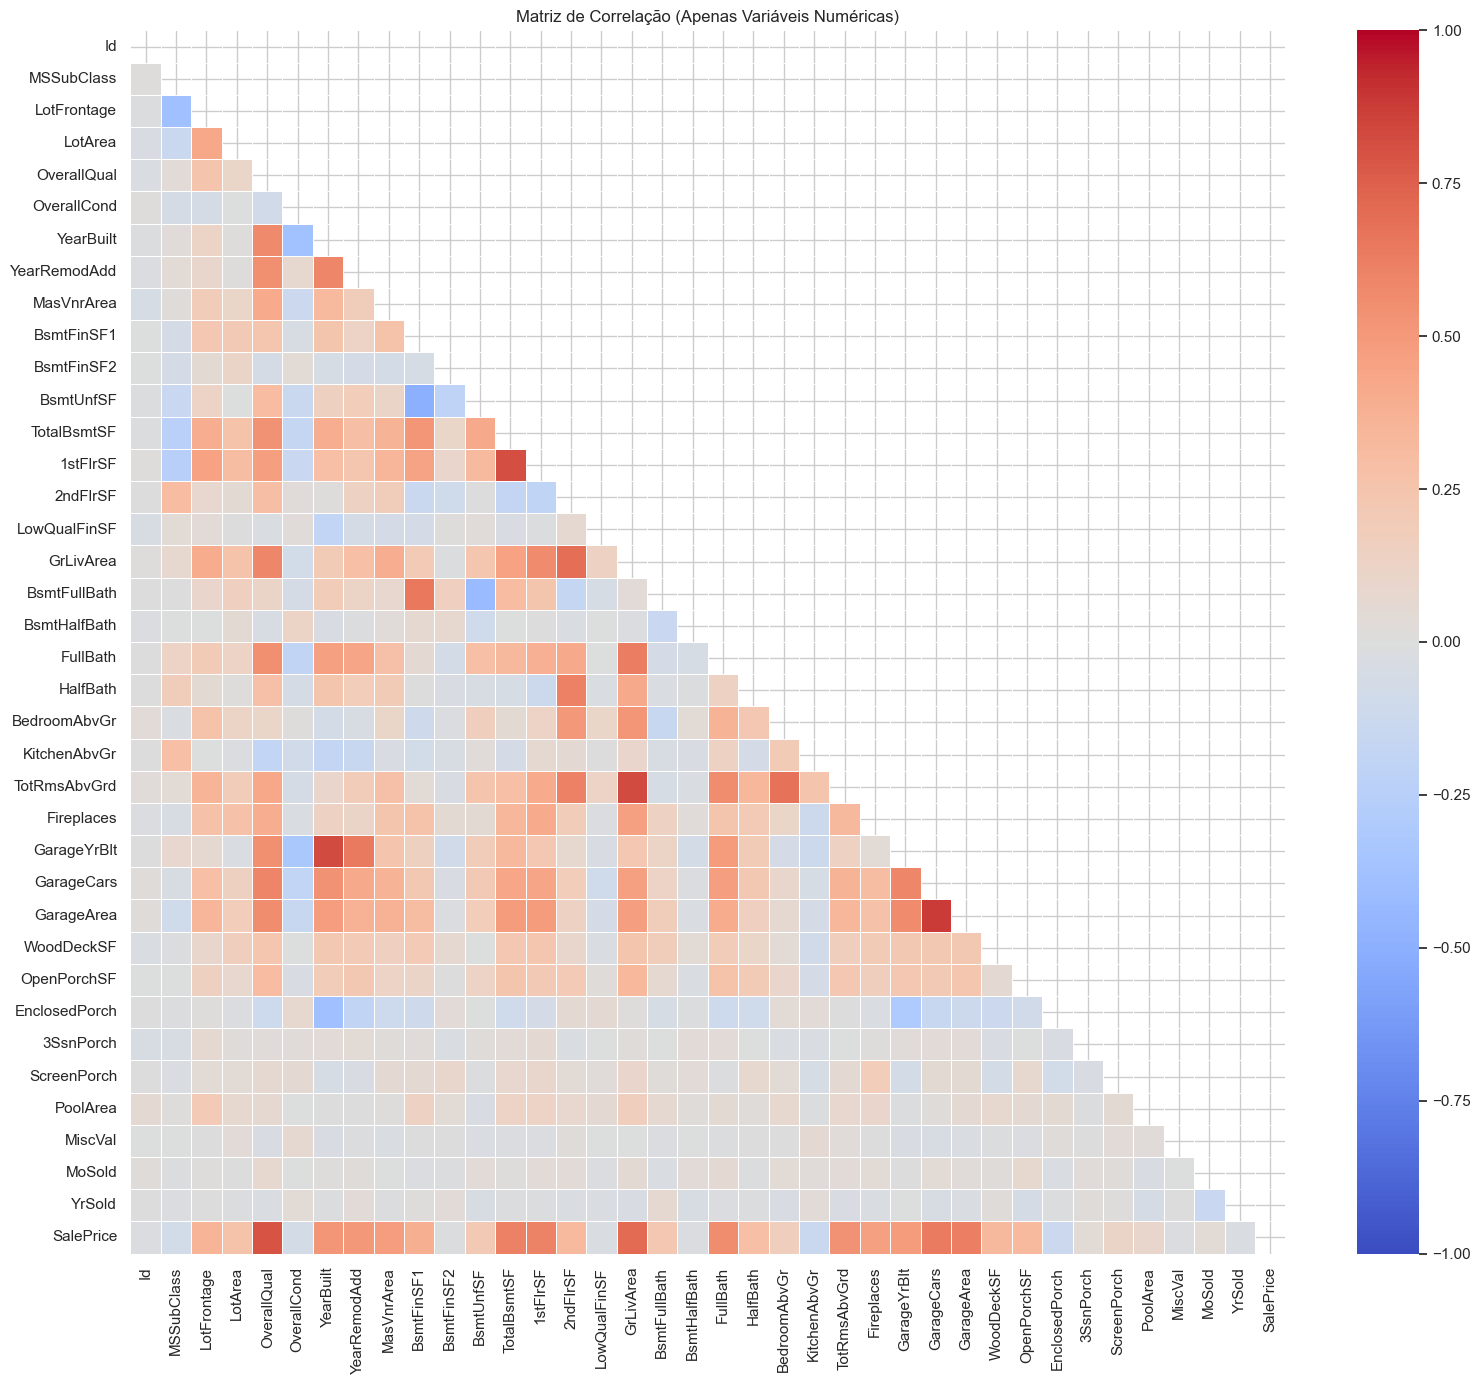

In [21]:
# 1. Matriz de Correlação
plt.figure(figsize=(16, 14))
correlation_matrix = df_numeric.corr()
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
sns.heatmap(correlation_matrix, mask=mask, annot=False, cmap='coolwarm', 
            center=0, vmin=-1, vmax=1, linewidths=0.5)
plt.title('Matriz de Correlação (Apenas Variáveis Numéricas)')
plt.tight_layout()
plt.show()

C:\Users\aline\AppData\Local\Temp\ipykernel_25484\2666139841.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_corr.values, y=top_corr.index, palette='viridis')


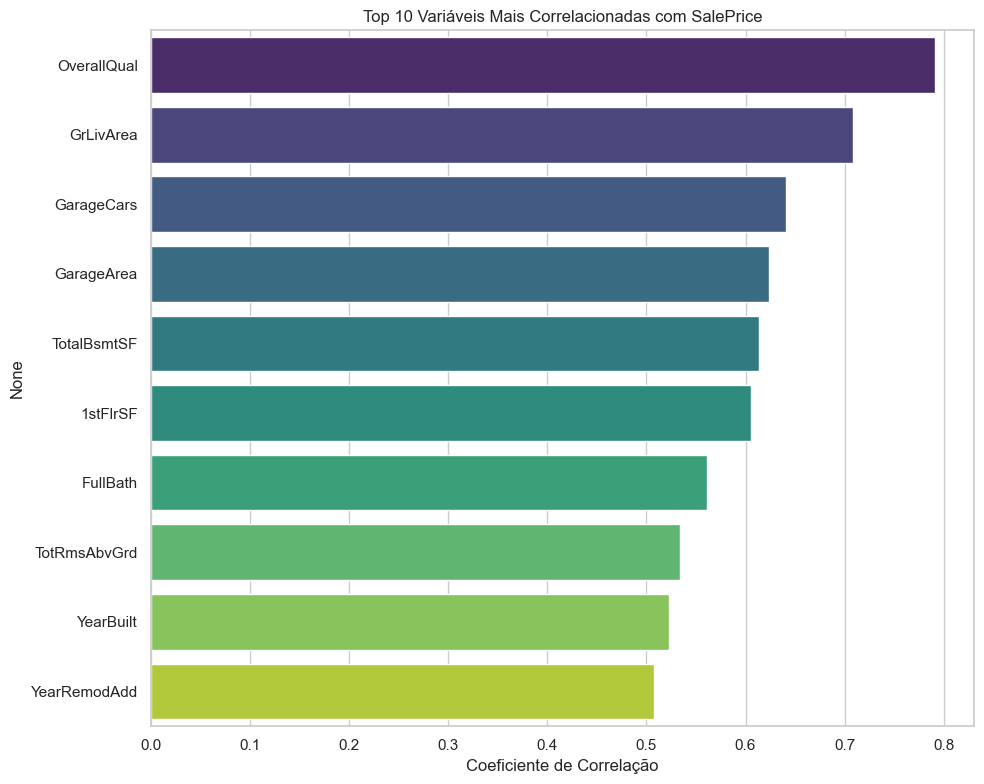

In [22]:
# 2. Top 10 variáveis mais correlacionadas com SalePrice
plt.figure(figsize=(10, 8))
top_corr = correlation_matrix['SalePrice'].sort_values(ascending=False).head(11)
top_corr = top_corr[1:]  # Remove a correlação de SalePrice com ele mesmo
sns.barplot(x=top_corr.values, y=top_corr.index, palette='viridis')
plt.title('Top 10 Variáveis Mais Correlacionadas com SalePrice')
plt.xlabel('Coeficiente de Correlação')
plt.tight_layout()
plt.show()

In [24]:
# 3. Análise de Multicolinearidade
# Calcular VIF (Variance Inflation Factor)
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [25]:
# Selecionar apenas as colunas numéricas sem valores nulos
df_numeric = df_numeric.dropna(axis=1)
X = df_numeric.drop('SalePrice', axis=1)

In [26]:
# Calcular VIF
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) 
                   for i in range(len(X.columns))]

d:\ProjetosGit\kaggle-regression-lab\.venv\Lib\site-packages\statsmodels\stats\outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


In [27]:
# Ordenar por VIF
vif_data = vif_data.sort_values('VIF', ascending=False)

print("\nAnálise de Multicolinearidade (VIF):")
print("VIF > 10 indica alta multicolinearidade")
display(vif_data.head(10))  # Mostrar as 10 variáveis com maior VIF


Análise de Multicolinearidade (VIF):
VIF > 10 indica alta multicolinearidade


feature           VIF
9      BsmtUnfSF           inf
8     BsmtFinSF2           inf
13  LowQualFinSF           inf
12      2ndFlrSF           inf
7     BsmtFinSF1           inf
14     GrLivArea           inf
11      1stFlrSF           inf
10   TotalBsmtSF           inf
33        YrSold  2.189658e+04
6   YearRemodAdd  2.054789e+04

In [30]:
# 4. Análise de Outliers nas Variáveis Numéricas
def detect_outliers(df, columns, threshold=1.5):
    outliers_list = []  # Lista para armazenar os dados dos outliers
    
    for col in columns:
        if col != 'SalePrice' and col in df.columns:  # Verifica se a coluna existe no DataFrame
            Q1 = df[col].quantile(0.25)
            Q3 = df[col].quantile(0.75)
            IQR = Q3 - Q1
            lower_bound = Q1 - threshold * IQR
            upper_bound = Q3 + threshold * IQR
            
            n_outliers = ((df[col] < lower_bound) | (df[col] > upper_bound)).sum()
            pct_outliers = (n_outliers / len(df)) * 100
            
            if n_outliers > 0:  # Só adiciona se houver outliers
                outliers_list.append({
                    'Variável': col,
                    'Número de Outliers': n_outliers,
                    'Percentual': f"{pct_outliers:.2f}%"
                })
    
    # Converter a lista para DataFrame
    return pd.DataFrame(outliers_list).sort_values('Número de Outliers', ascending=False)

In [31]:
# Analisar outliers nas colunas numéricas
print("\nAnálise de Outliers nas Variáveis Numéricas:")
if not df_numeric.empty:
    numeric_cols = df_numeric.select_dtypes(include=['int64', 'float64']).columns
    outliers_analysis = detect_outliers(df, numeric_cols)
    
    if not outliers_analysis.empty:
        display(outliers_analysis.head(15))  # Mostrar as 15 variáveis com mais outliers
    else:
        print("Nenhum outlier encontrado nas variáveis numéricas.")
else:
    print("Nenhuma coluna numérica para análise de outliers.")


Análise de Outliers nas Variáveis Numéricas:


Variável  Número de Outliers Percentual
23  EnclosedPorch                 208     14.25%
6      BsmtFinSF2                 167     11.44%
3     OverallCond                 125      8.56%
25    ScreenPorch                 116      7.95%
0      MSSubClass                 103      7.05%
14   BsmtHalfBath                  82      5.62%
22    OpenPorchSF                  77      5.27%
1         LotArea                  69      4.73%
16   KitchenAbvGr                  68      4.66%
8     TotalBsmtSF                  61      4.18%
27        MiscVal                  52      3.56%
15   BedroomAbvGr                  35      2.40%
21     WoodDeckSF                  32      2.19%
12      GrLivArea                  31      2.12%
17   TotRmsAbvGrd                  30      2.05%

## Análise das Variáveis Categóricas


Total de variáveis categóricas: 43

1. Frequência de Categorias por Variável:

MSZoning:


MSZoning
RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: count, dtype: int64

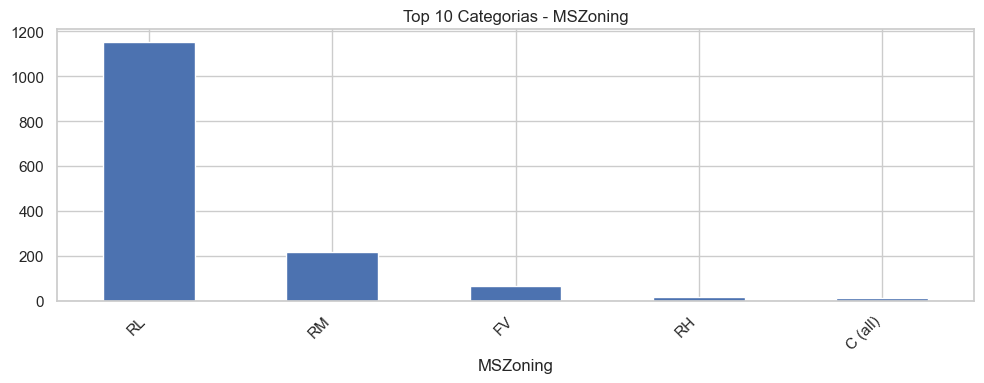


Street:


Street
Pave    1454
Grvl       6
Name: count, dtype: int64

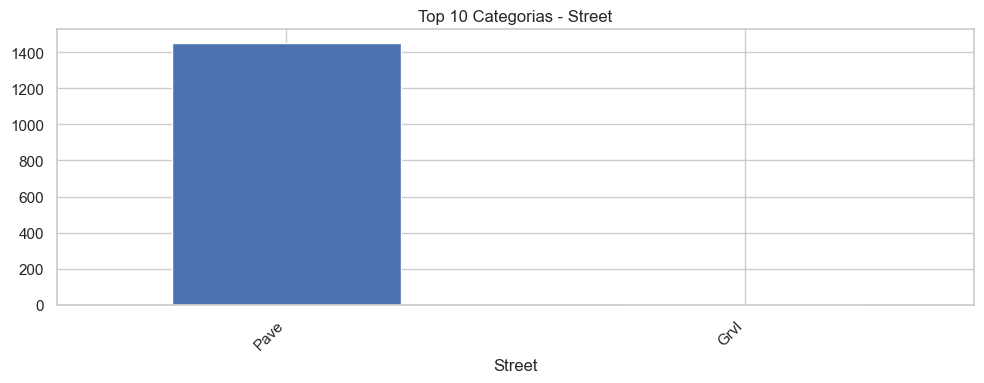


Alley:


Alley
NaN     1369
Grvl      50
Pave      41
Name: count, dtype: int64

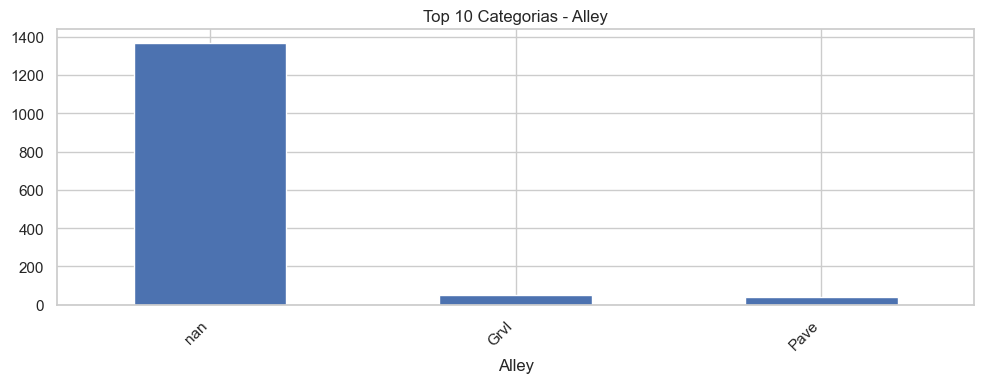


LotShape:


LotShape
Reg    925
IR1    484
IR2     41
IR3     10
Name: count, dtype: int64

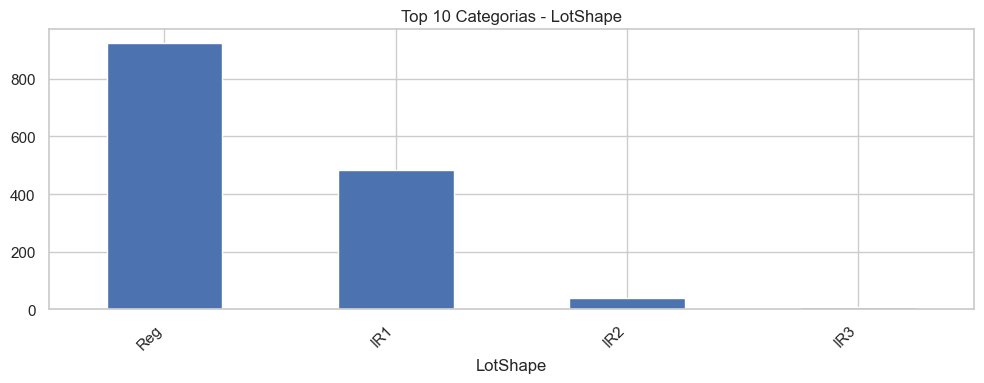


LandContour:


LandContour
Lvl    1311
Bnk      63
HLS      50
Low      36
Name: count, dtype: int64

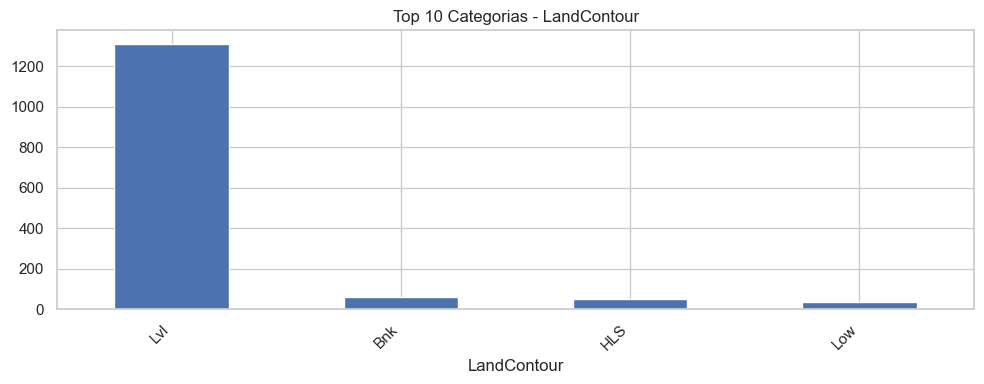


Utilities:


Utilities
AllPub    1459
NoSeWa       1
Name: count, dtype: int64

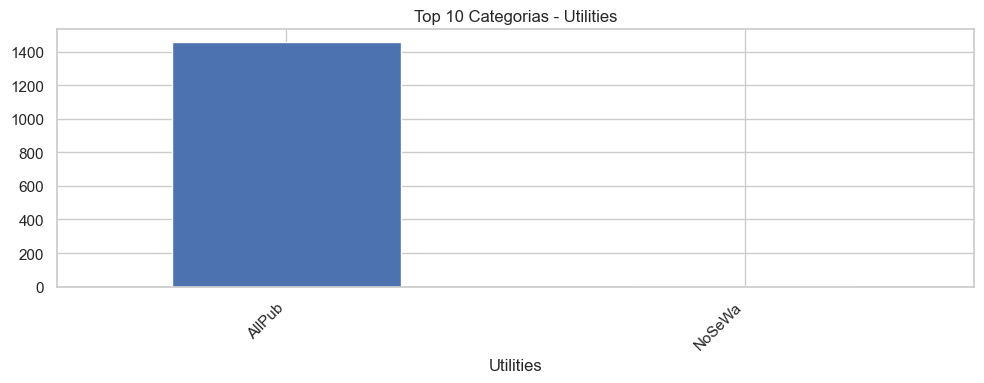


LotConfig:


LotConfig
Inside     1052
Corner      263
CulDSac      94
FR2          47
FR3           4
Name: count, dtype: int64

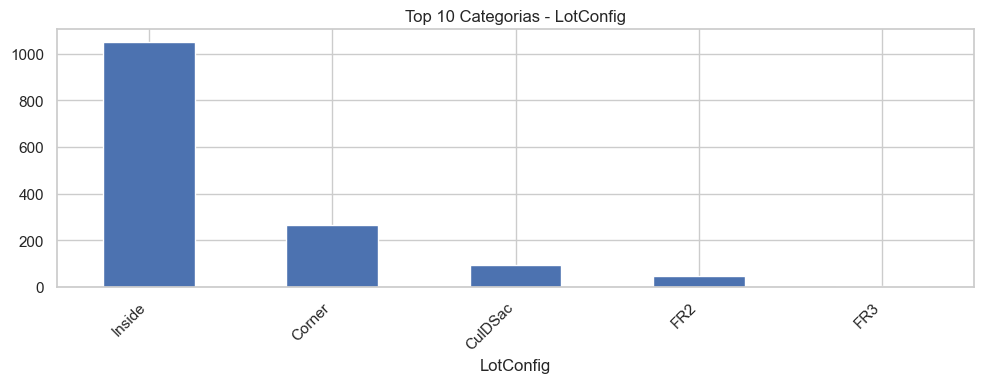


LandSlope:


LandSlope
Gtl    1382
Mod      65
Sev      13
Name: count, dtype: int64

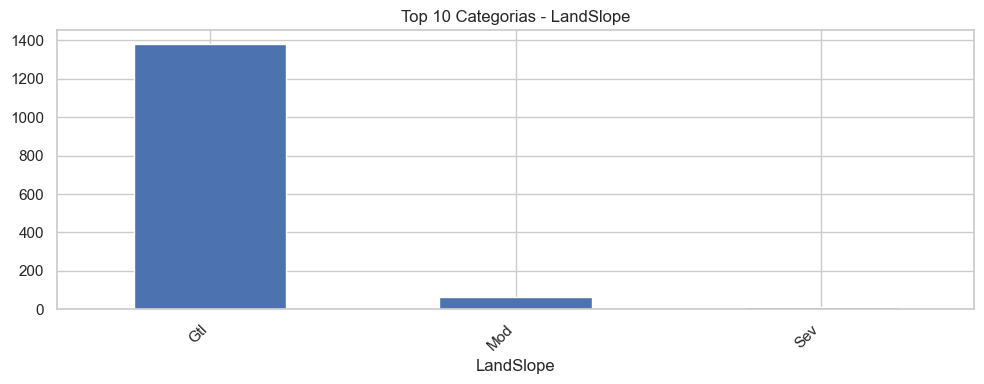


Neighborhood:


Neighborhood
NAmes      225
CollgCr    150
OldTown    113
Edwards    100
Somerst     86
Gilbert     79
NridgHt     77
Sawyer      74
NWAmes      73
SawyerW     59
BrkSide     58
Crawfor     51
Mitchel     49
NoRidge     41
Timber      38
IDOTRR      37
ClearCr     28
SWISU       25
StoneBr     25
Blmngtn     17
MeadowV     17
BrDale      16
Veenker     11
NPkVill      9
Blueste      2
Name: count, dtype: int64

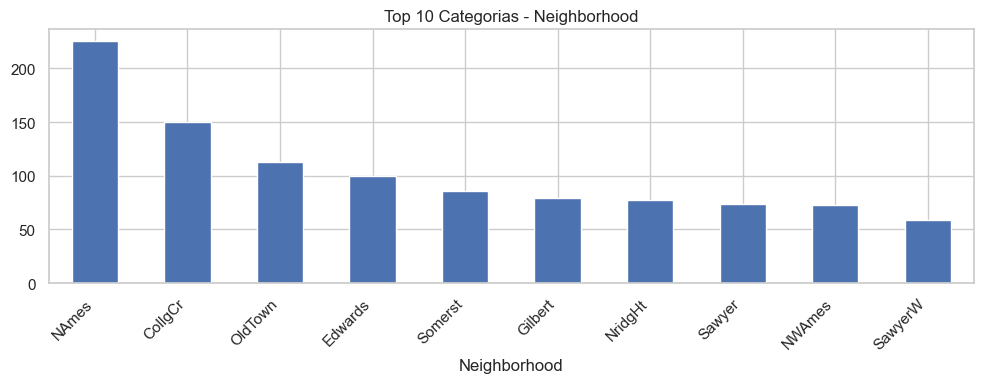


Condition1:


Condition1
Norm      1260
Feedr       81
Artery      48
RRAn        26
PosN        19
RRAe        11
PosA         8
RRNn         5
RRNe         2
Name: count, dtype: int64

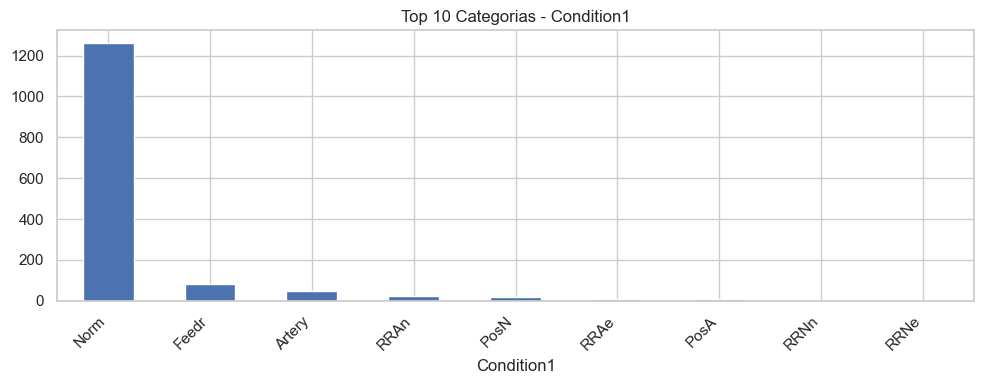


Condition2:


Condition2
Norm      1445
Feedr        6
Artery       2
RRNn         2
PosN         2
PosA         1
RRAn         1
RRAe         1
Name: count, dtype: int64

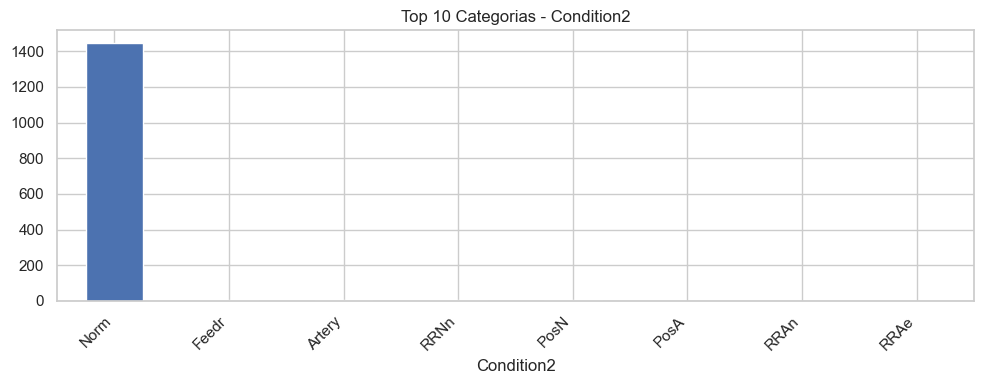


BldgType:


BldgType
1Fam      1220
TwnhsE     114
Duplex      52
Twnhs       43
2fmCon      31
Name: count, dtype: int64

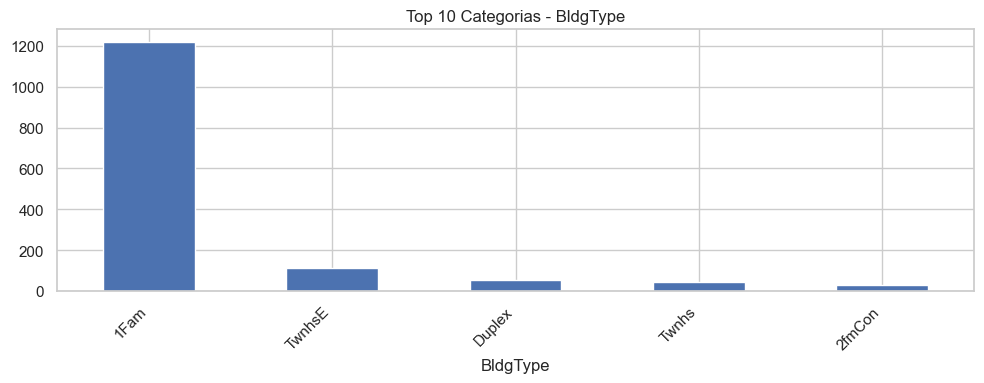


HouseStyle:


HouseStyle
1Story    726
2Story    445
1.5Fin    154
SLvl       65
SFoyer     37
1.5Unf     14
2.5Unf     11
2.5Fin      8
Name: count, dtype: int64

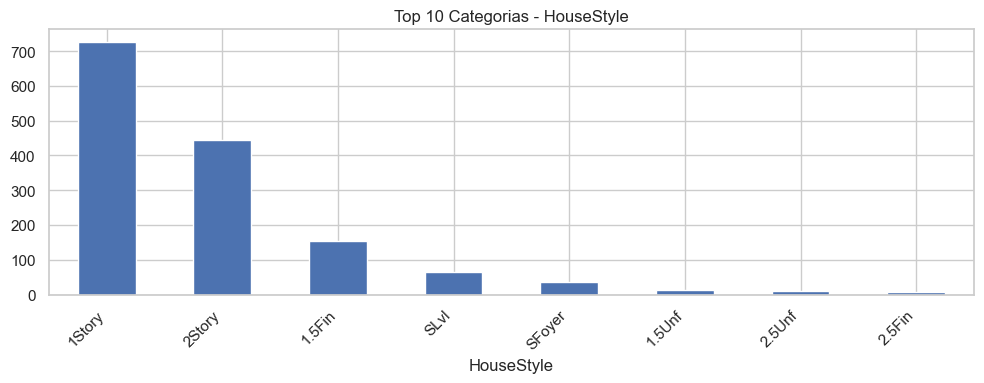


RoofStyle:


RoofStyle
Gable      1141
Hip         286
Flat         13
Gambrel      11
Mansard       7
Shed          2
Name: count, dtype: int64

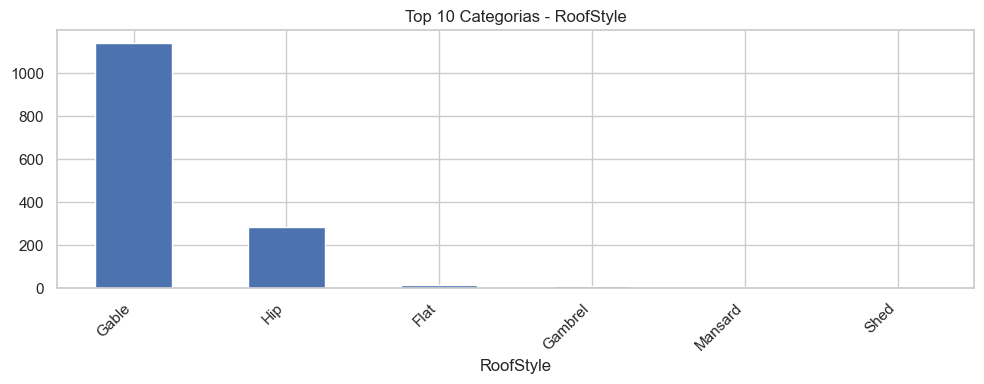


RoofMatl:


RoofMatl
CompShg    1434
Tar&Grv      11
WdShngl       6
WdShake       5
Metal         1
Membran       1
Roll          1
ClyTile       1
Name: count, dtype: int64

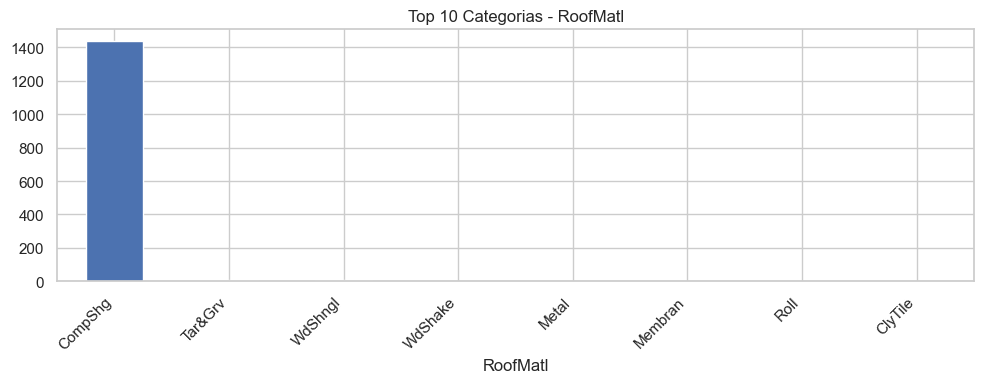


Exterior1st:


Exterior1st
VinylSd    515
HdBoard    222
MetalSd    220
Wd Sdng    206
Plywood    108
CemntBd     61
BrkFace     50
WdShing     26
Stucco      25
AsbShng     20
BrkComm      2
Stone        2
AsphShn      1
ImStucc      1
CBlock       1
Name: count, dtype: int64

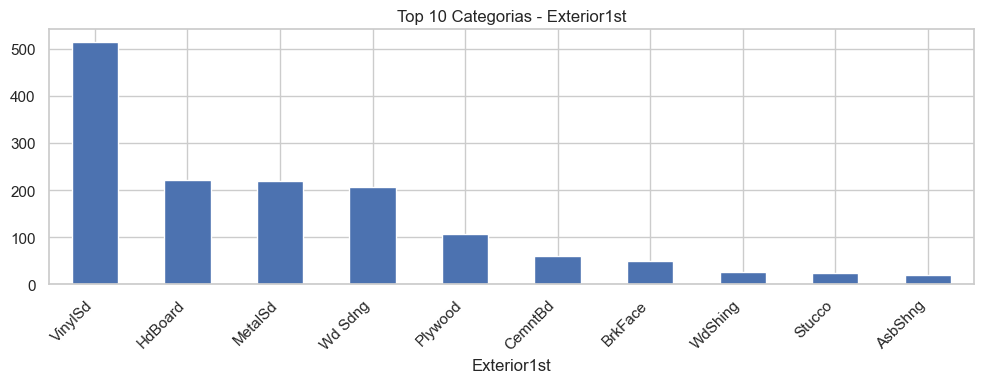


Exterior2nd:


Exterior2nd
VinylSd    504
MetalSd    214
HdBoard    207
Wd Sdng    197
Plywood    142
CmentBd     60
Wd Shng     38
Stucco      26
BrkFace     25
AsbShng     20
ImStucc     10
Brk Cmn      7
Stone        5
AsphShn      3
Other        1
CBlock       1
Name: count, dtype: int64

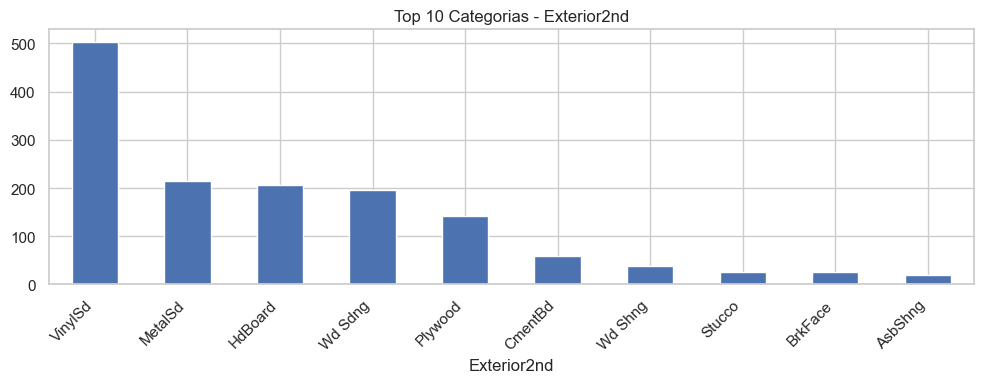


MasVnrType:


MasVnrType
NaN        872
BrkFace    445
Stone      128
BrkCmn      15
Name: count, dtype: int64

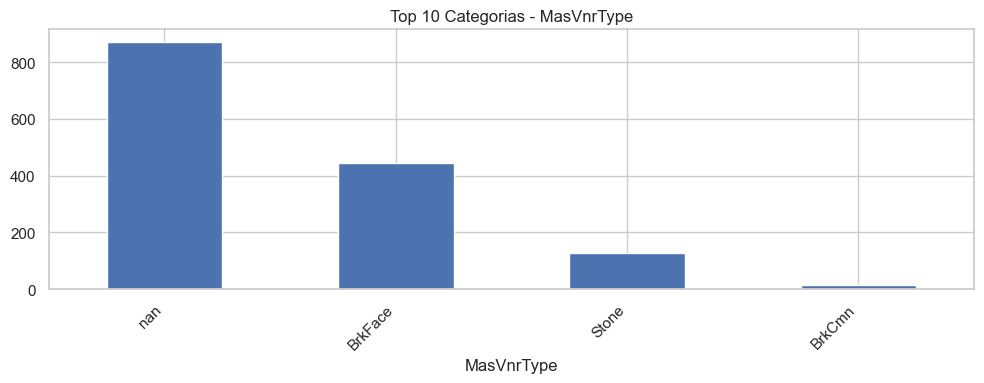


ExterQual:


ExterQual
TA    906
Gd    488
Ex     52
Fa     14
Name: count, dtype: int64

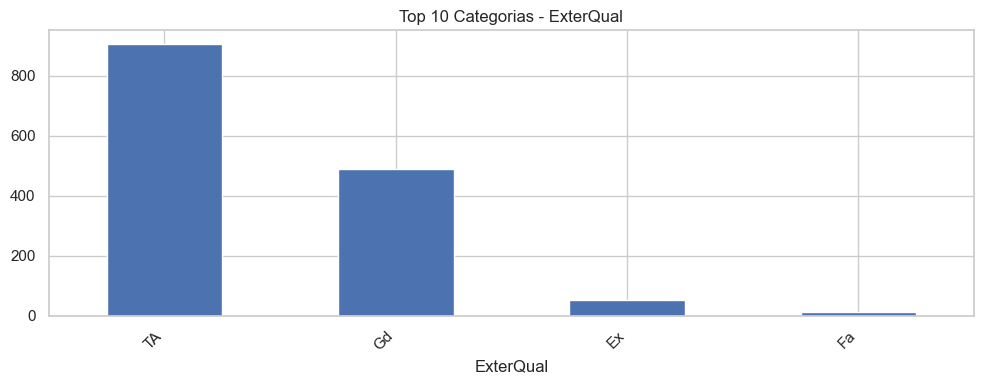


ExterCond:


ExterCond
TA    1282
Gd     146
Fa      28
Ex       3
Po       1
Name: count, dtype: int64

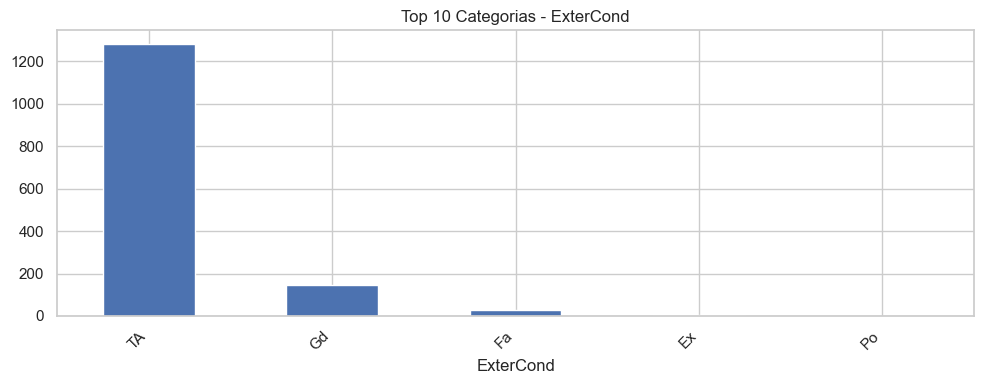


Foundation:


Foundation
PConc     647
CBlock    634
BrkTil    146
Slab       24
Stone       6
Wood        3
Name: count, dtype: int64

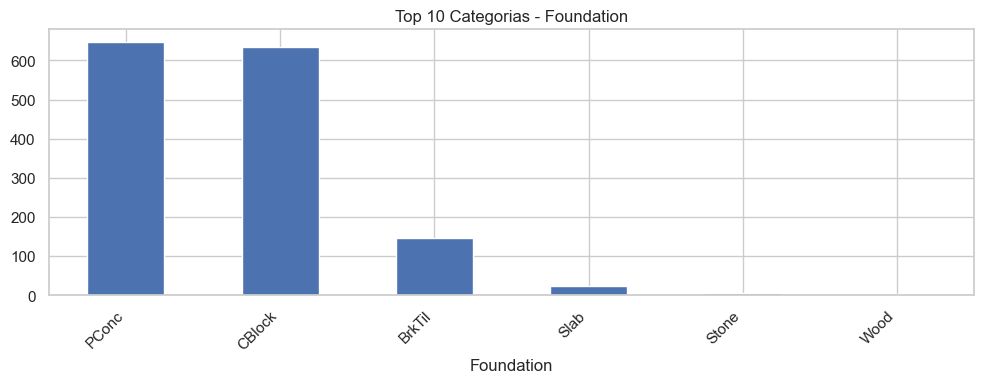


BsmtQual:


BsmtQual
TA     649
Gd     618
Ex     121
NaN     37
Fa      35
Name: count, dtype: int64

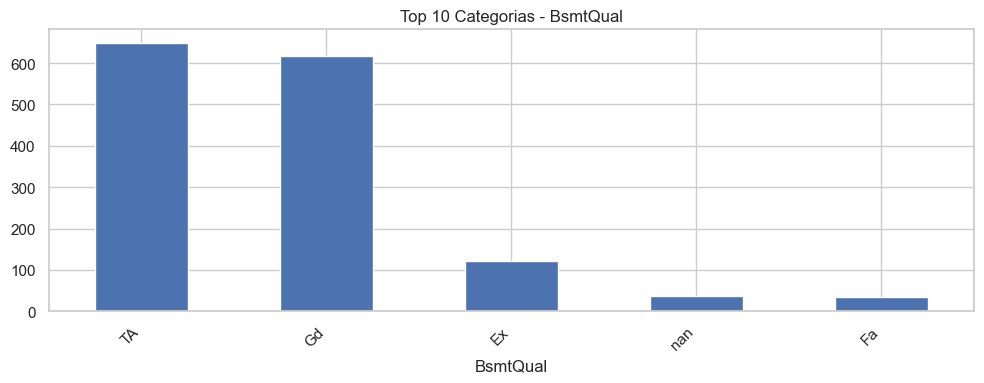


BsmtCond:


BsmtCond
TA     1311
Gd       65
Fa       45
NaN      37
Po        2
Name: count, dtype: int64

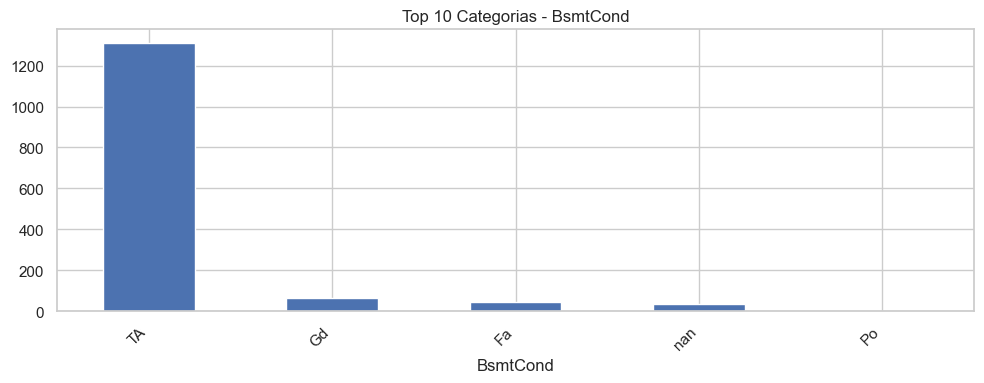


BsmtExposure:


BsmtExposure
No     953
Av     221
Gd     134
Mn     114
NaN     38
Name: count, dtype: int64

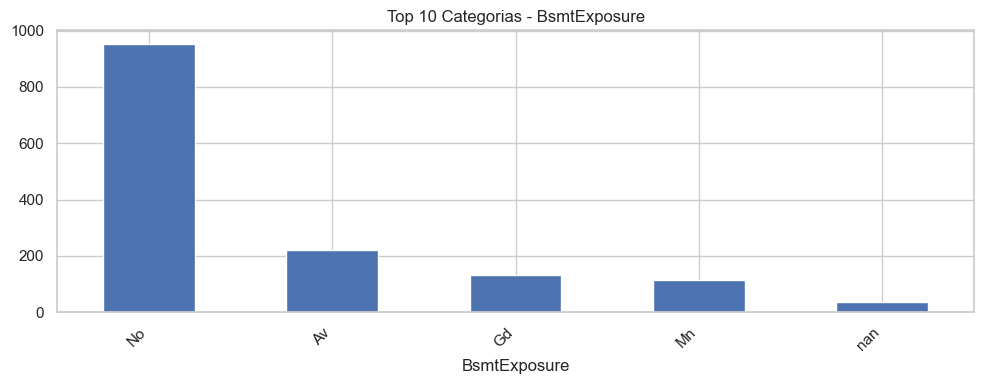


BsmtFinType1:


BsmtFinType1
Unf    430
GLQ    418
ALQ    220
BLQ    148
Rec    133
LwQ     74
NaN     37
Name: count, dtype: int64

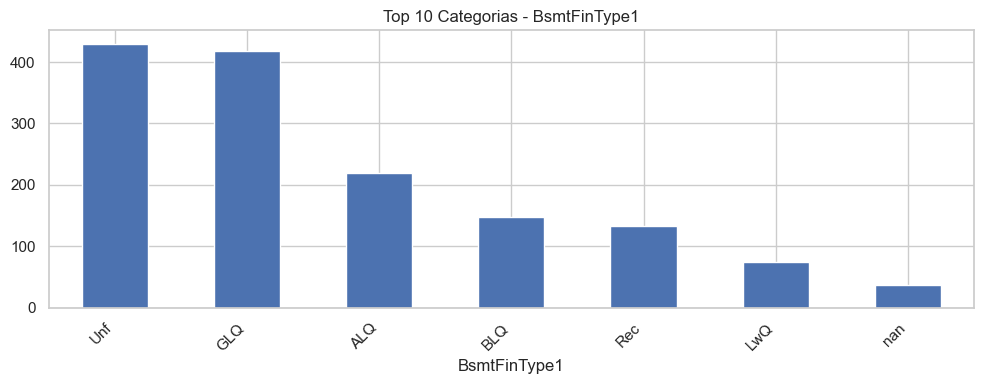


BsmtFinType2:


BsmtFinType2
Unf    1256
Rec      54
LwQ      46
NaN      38
BLQ      33
ALQ      19
GLQ      14
Name: count, dtype: int64

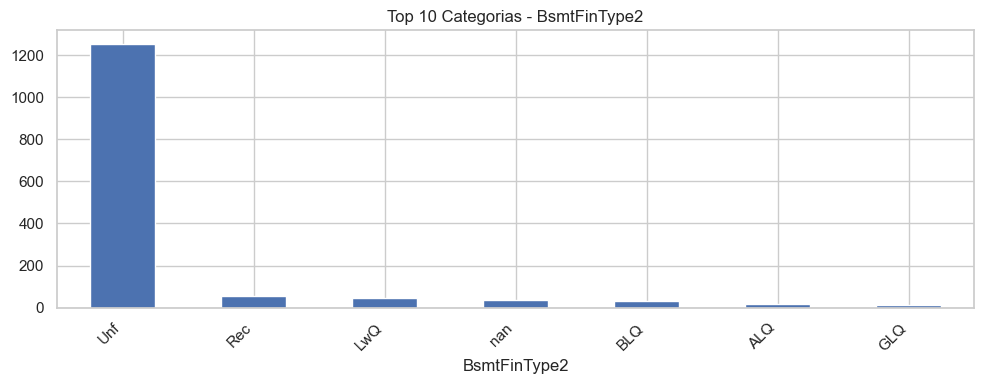


Heating:


Heating
GasA     1428
GasW       18
Grav        7
Wall        4
OthW        2
Floor       1
Name: count, dtype: int64

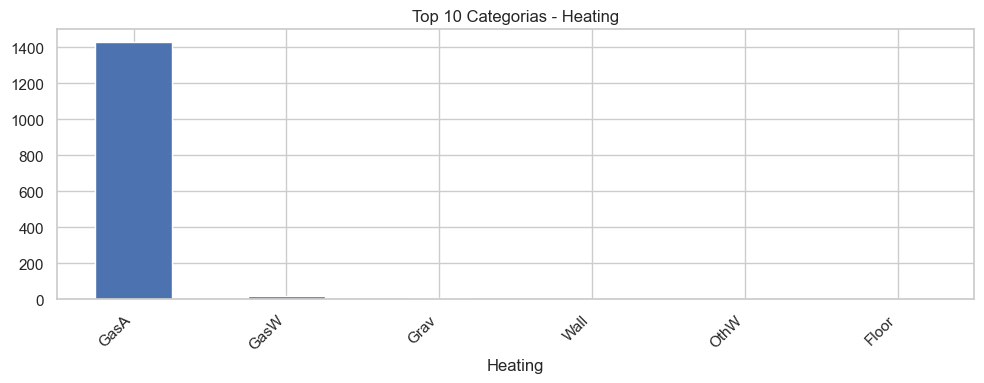


HeatingQC:


HeatingQC
Ex    741
TA    428
Gd    241
Fa     49
Po      1
Name: count, dtype: int64

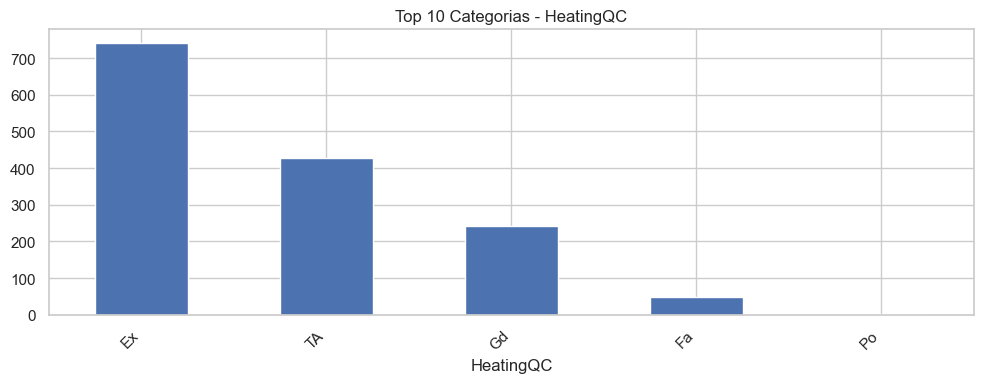


CentralAir:


CentralAir
Y    1365
N      95
Name: count, dtype: int64

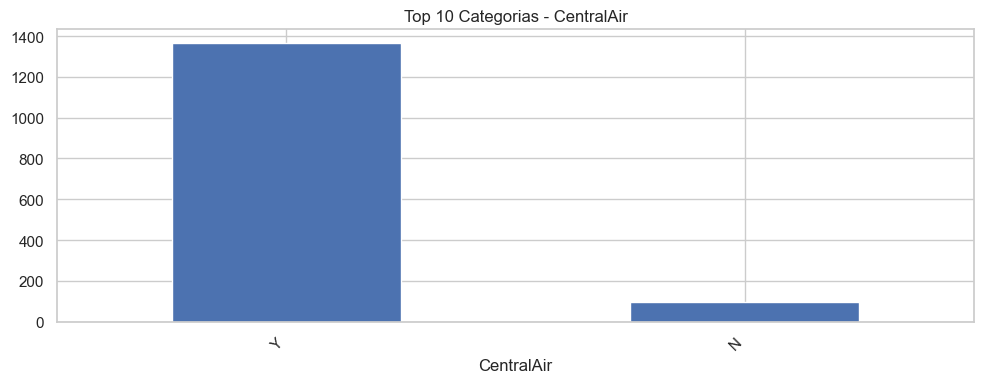


Electrical:


Electrical
SBrkr    1334
FuseA      94
FuseF      27
FuseP       3
Mix         1
NaN         1
Name: count, dtype: int64

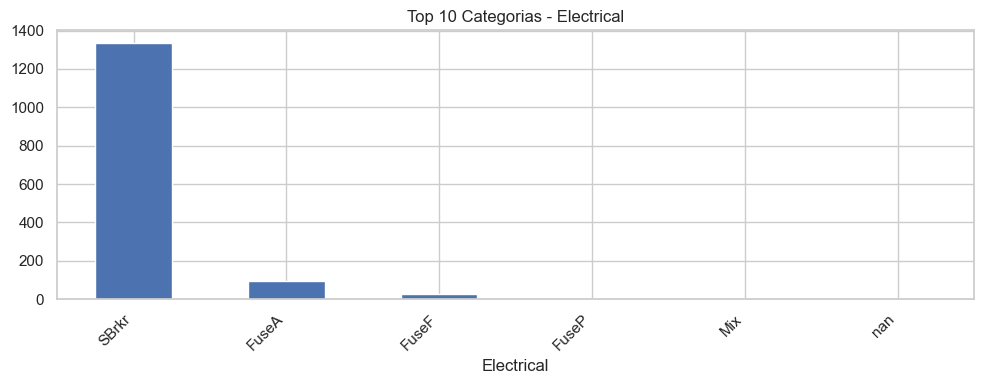


KitchenQual:


KitchenQual
TA    735
Gd    586
Ex    100
Fa     39
Name: count, dtype: int64

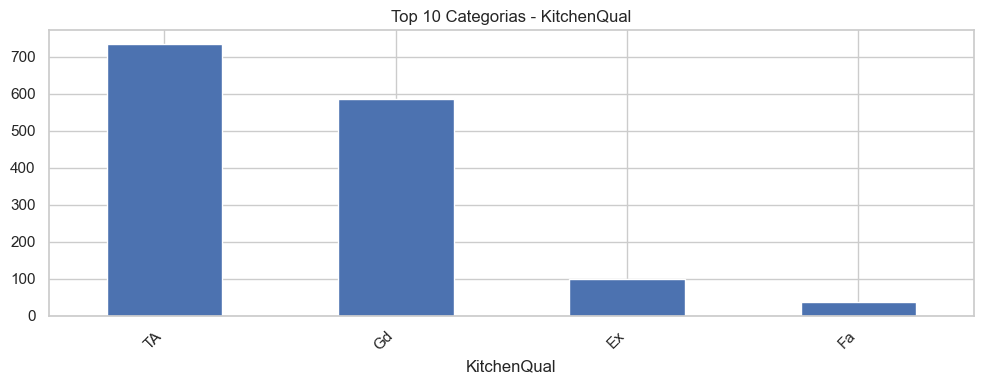


Functional:


Functional
Typ     1360
Min2      34
Min1      31
Mod       15
Maj1      14
Maj2       5
Sev        1
Name: count, dtype: int64

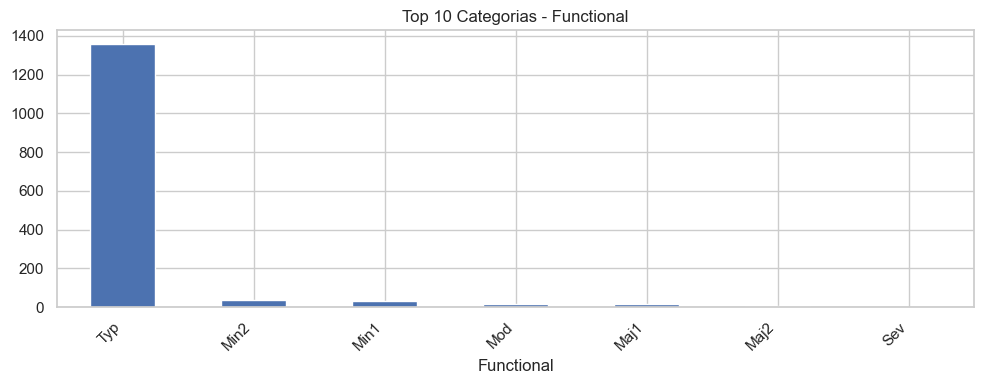


FireplaceQu:


FireplaceQu
NaN    690
Gd     380
TA     313
Fa      33
Ex      24
Po      20
Name: count, dtype: int64

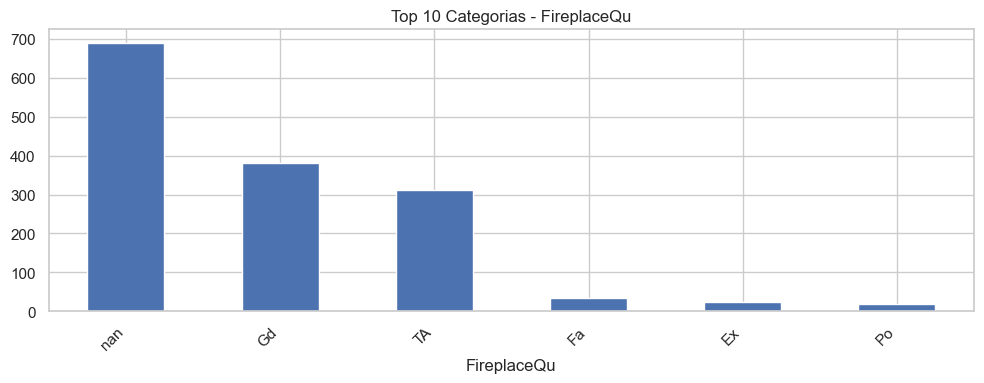


GarageType:


GarageType
Attchd     870
Detchd     387
BuiltIn     88
NaN         81
Basment     19
CarPort      9
2Types       6
Name: count, dtype: int64

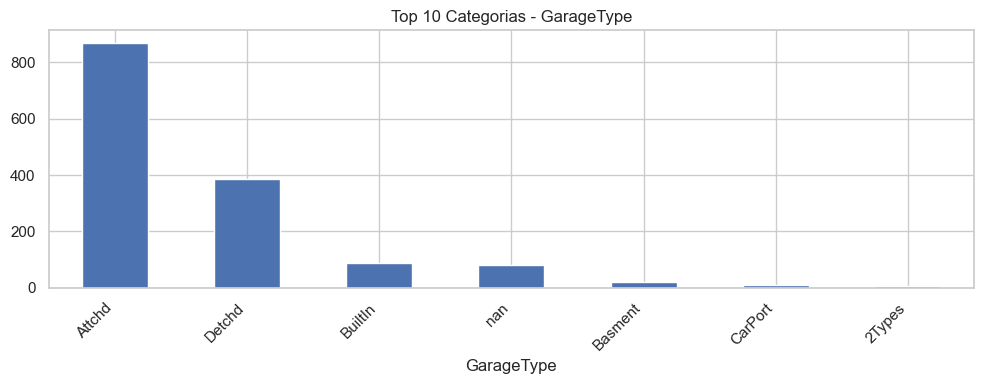


GarageFinish:


GarageFinish
Unf    605
RFn    422
Fin    352
NaN     81
Name: count, dtype: int64

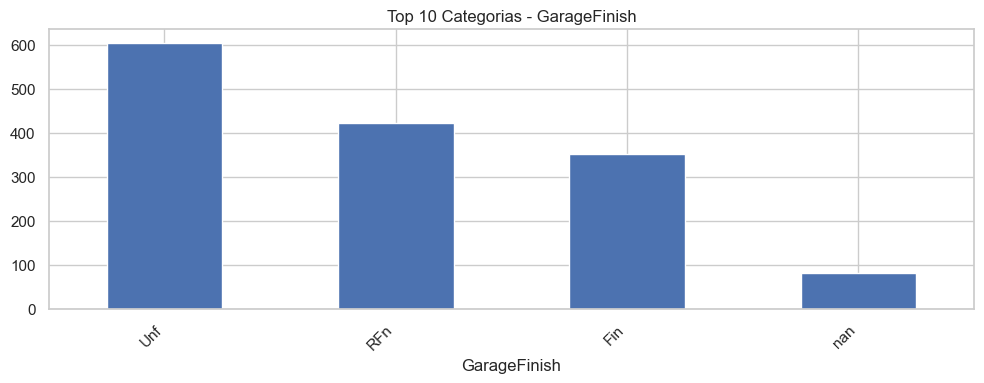


GarageQual:


GarageQual
TA     1311
NaN      81
Fa       48
Gd       14
Ex        3
Po        3
Name: count, dtype: int64

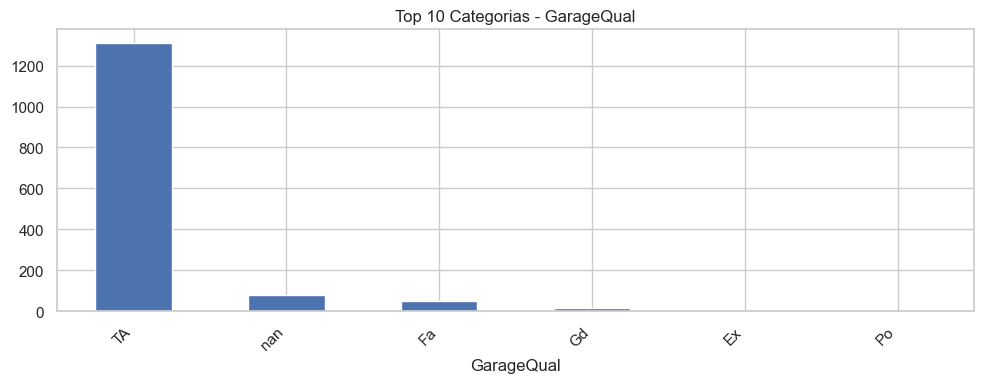


GarageCond:


GarageCond
TA     1326
NaN      81
Fa       35
Gd        9
Po        7
Ex        2
Name: count, dtype: int64

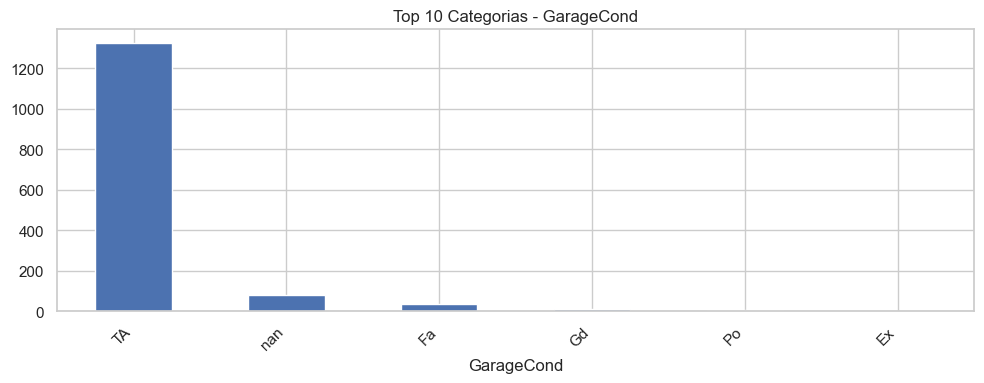


PavedDrive:


PavedDrive
Y    1340
N      90
P      30
Name: count, dtype: int64

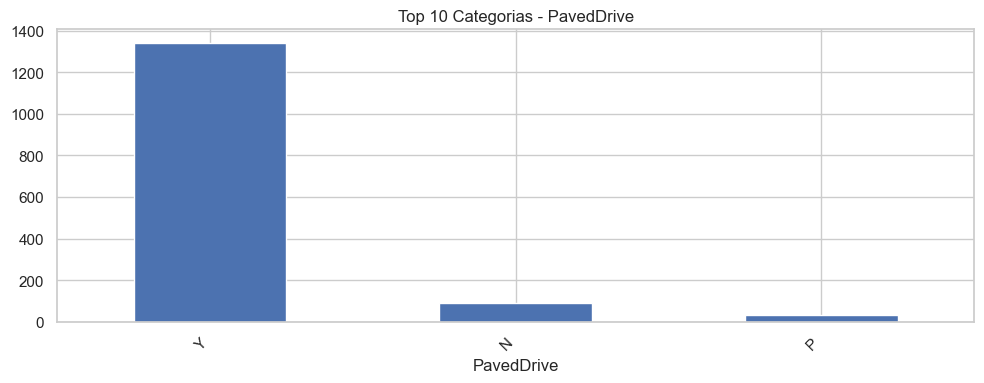


PoolQC:


PoolQC
NaN    1453
Gd        3
Ex        2
Fa        2
Name: count, dtype: int64

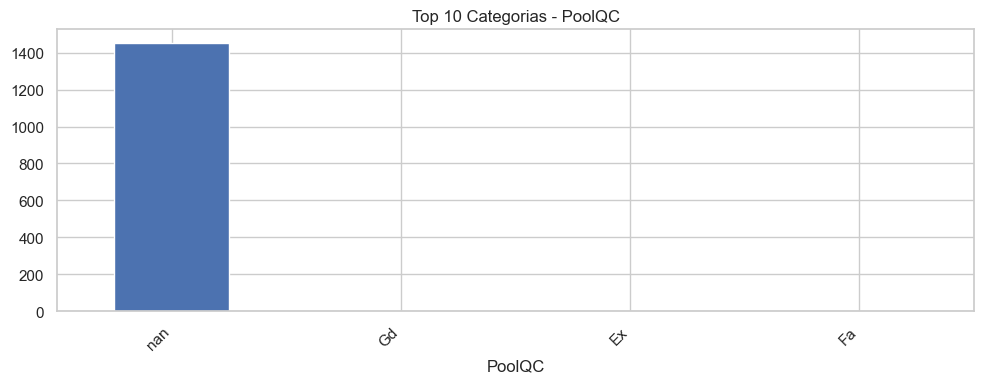


Fence:


Fence
NaN      1179
MnPrv     157
GdPrv      59
GdWo       54
MnWw       11
Name: count, dtype: int64

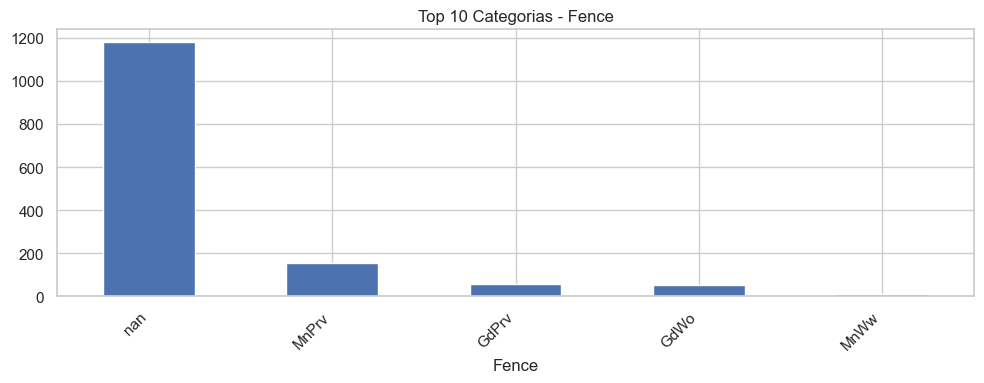


MiscFeature:


MiscFeature
NaN     1406
Shed      49
Gar2       2
Othr       2
TenC       1
Name: count, dtype: int64

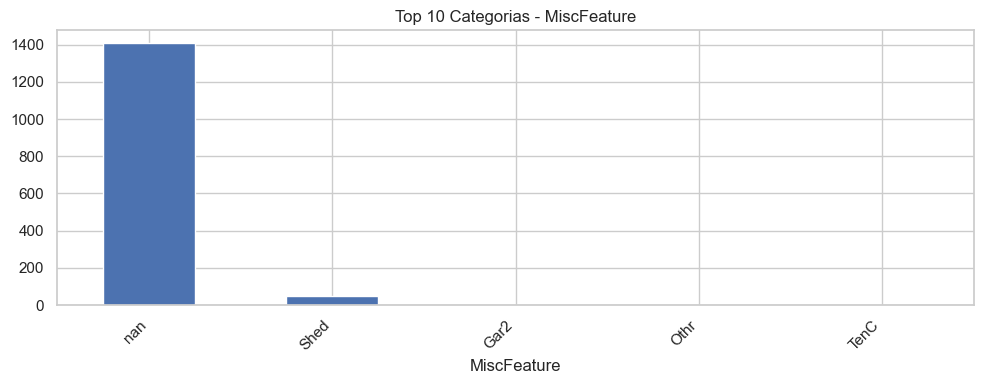


SaleType:


SaleType
WD       1267
New       122
COD        43
ConLD       9
ConLI       5
ConLw       5
CWD         4
Oth         3
Con         2
Name: count, dtype: int64

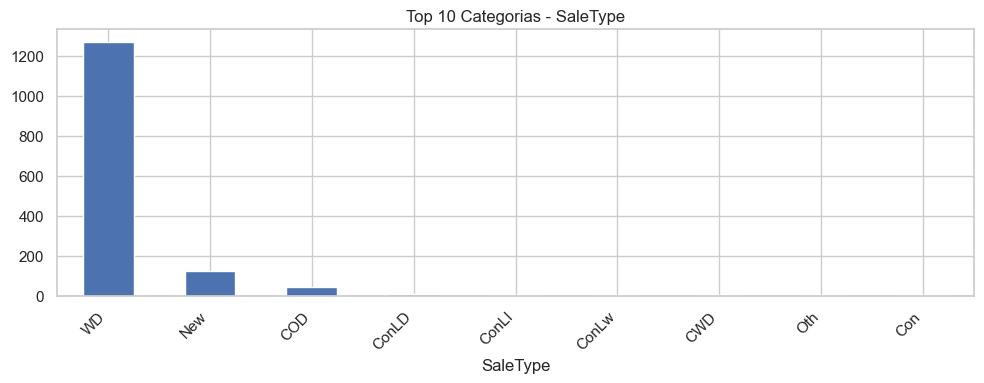


SaleCondition:


SaleCondition
Normal     1198
Partial     125
Abnorml     101
Family       20
Alloca       12
AdjLand       4
Name: count, dtype: int64

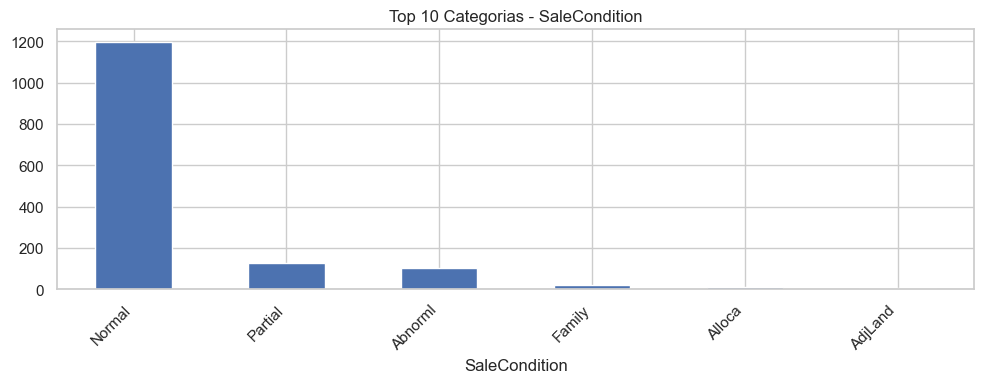


2. Relação com SalePrice (Boxplot):


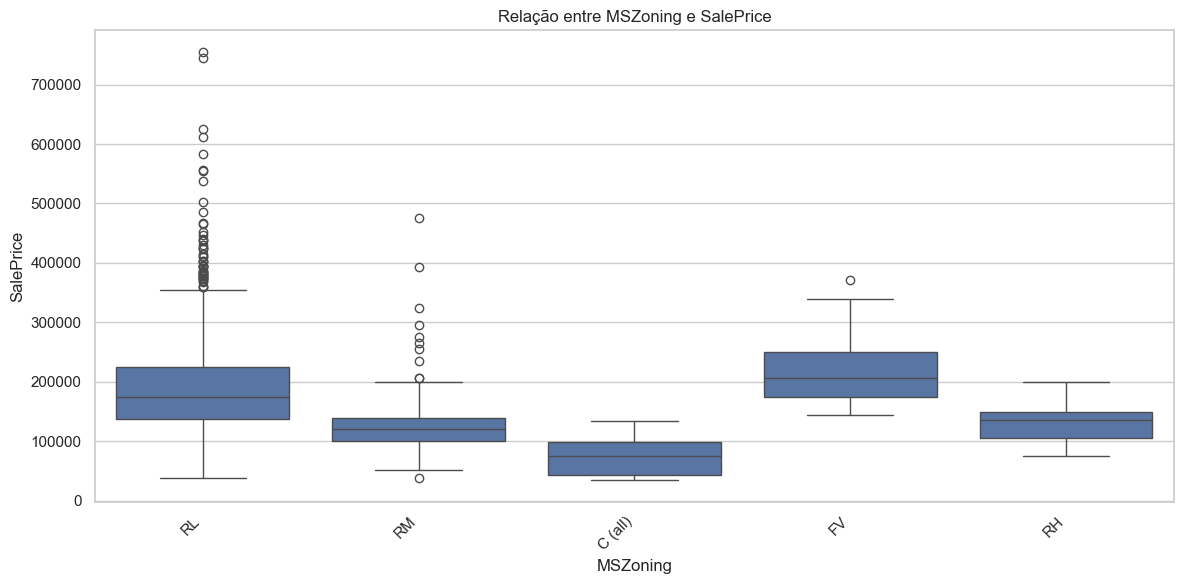

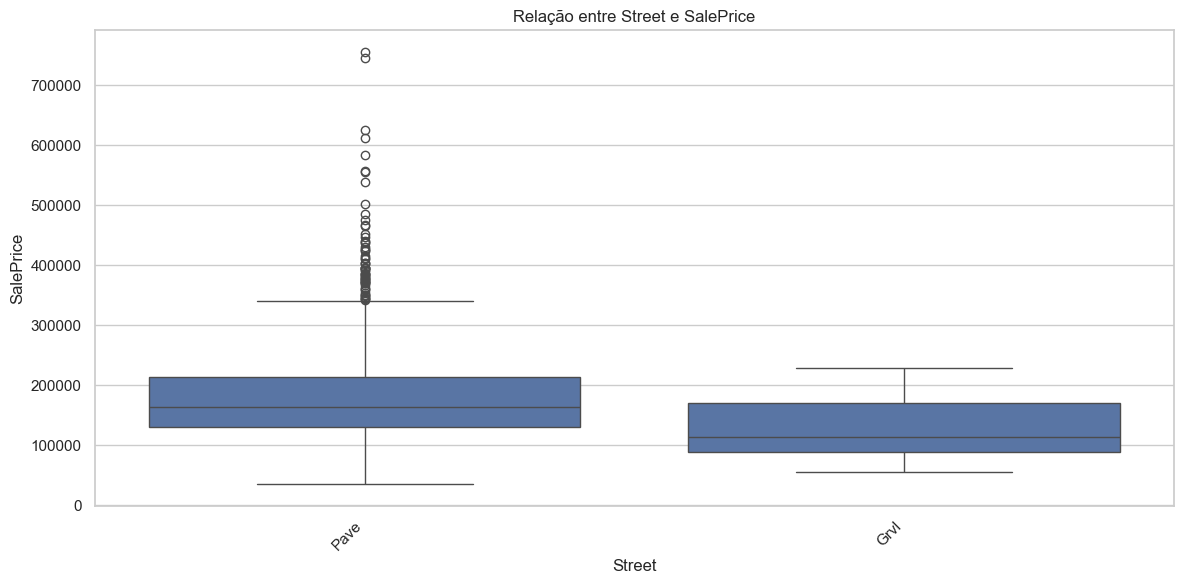

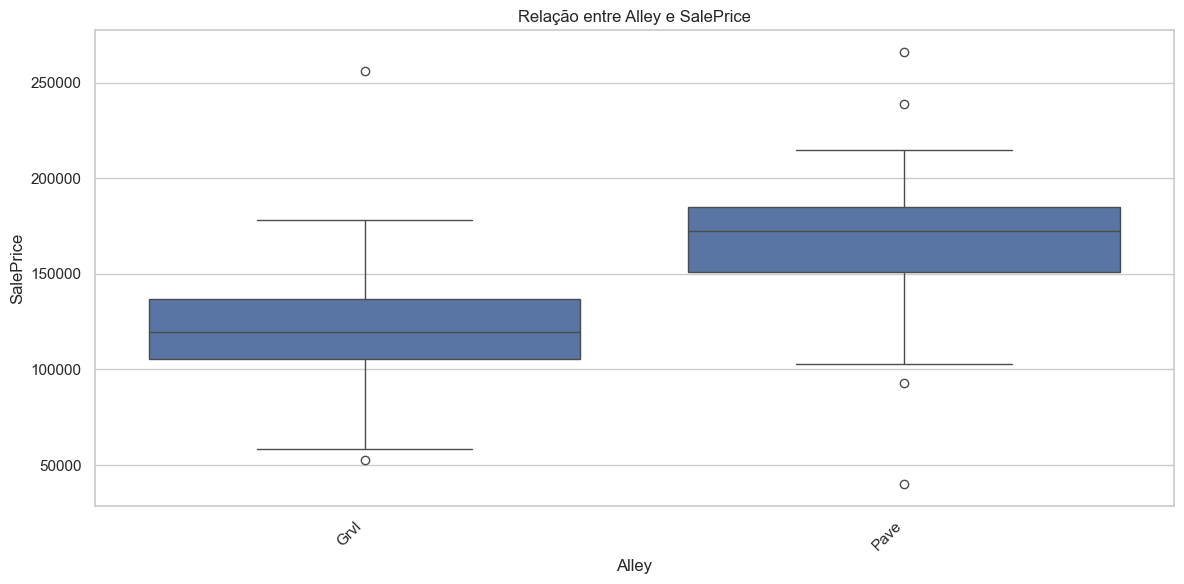

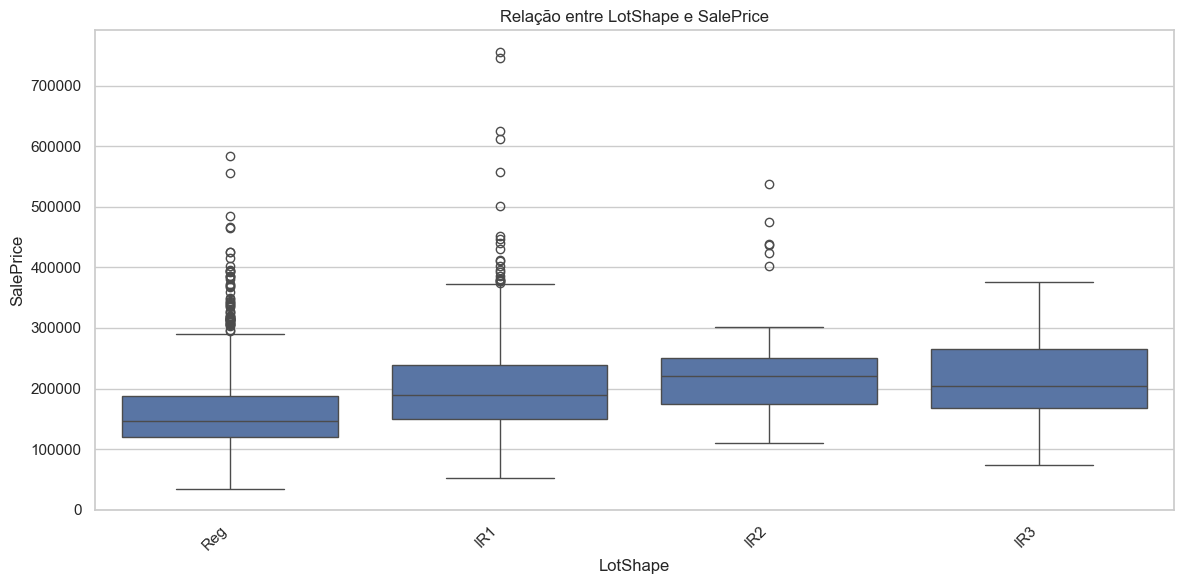

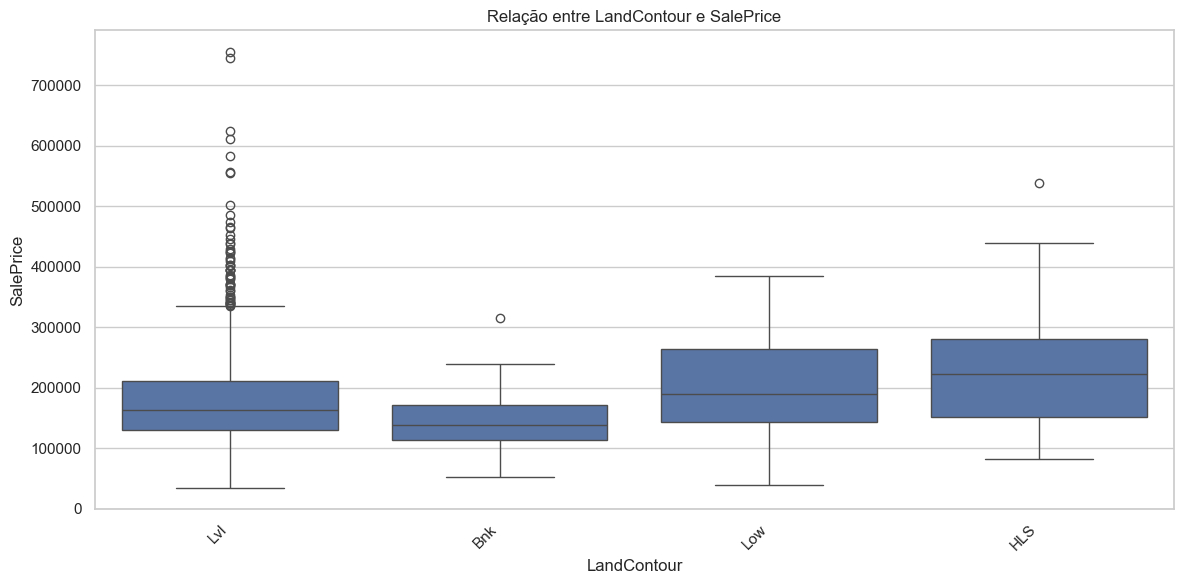


3. Análise de Significância (ANOVA):

Teste ANOVA para variáveis categóricas:


C:\Users\aline\AppData\Local\Temp\ipykernel_25484\1164480394.py:43: SmallSampleWarning: One or more sample arguments is too small; all returned values will be NaN. See documentation for sample size requirements.
  f_val, p_val = stats.f_oneway(*groups)


Variável  Categorias     F-valor        P-valor  \
8    Neighborhood          25   71.784865  1.558600e-225   
18      ExterQual           4  443.334831  1.439551e-204   
30    KitchenQual           4  407.806352  3.032213e-192   
20     Foundation           6  100.253851   5.791895e-91   
27      HeatingQC           5   88.394462   2.667062e-67   
42  SaleCondition           6   45.578428   7.988268e-44   
15    Exterior1st          15   18.611743   2.586089e-43   
16    Exterior2nd          16   17.500840   4.842186e-43   
41       SaleType           9   28.863054   5.039767e-42   
0        MSZoning           5   43.840282   8.817634e-35   
12     HouseStyle           8   19.595001   3.376777e-25   
3        LotShape           4   40.132852   6.447524e-25   
28     CentralAir           2   98.305344   1.809506e-22   
37     PavedDrive           3   42.024179   1.803569e-18   
13      RoofStyle           6   17.805497   3.653523e-17   
11       BldgType           5   13.011077   2.056736e-10   
4     LandContour           4   12.850188   2.742217e-08   
14       RoofMatl           8    6.727305   7.231445e-08   
9      Condition1           9    6.118017   8.904549e-08   
19      ExterCond           5    8.798714   5.106681e-07   
6       LotConfig           5    7.809954   3.163167e-06   
31     Functional           7    4.057875   4.841697e-04   
26        Heating           6    4.259819   7.534721e-04   
10     Condition2           8    2.073899   4.342566e-02   
1          Street           2    2.459290   1.170486e-01   
7       LandSlope           3    1.958817   1.413964e-01   
5       Utilities           2    0.298804   5.847168e-01   
2           Alley           3         NaN            NaN   
17     MasVnrType           4         NaN            NaN   
21       BsmtQual           5         NaN            NaN   
22       BsmtCond           5         NaN            NaN   
23   BsmtExposure           5         NaN            NaN   
24   BsmtFinType1           7         NaN            NaN   
25   BsmtFinType2           7         NaN            NaN   
29     Electrical           6         NaN            NaN   
32    FireplaceQu           6         NaN            NaN   
33     GarageType           7         NaN            NaN   
34   GarageFinish           4         NaN            NaN   
35     GarageQual           6         NaN            NaN   
36     GarageCond           6         NaN            NaN   
38         PoolQC           4         NaN            NaN   
39          Fence           5         NaN            NaN   
40    MiscFeature           5         NaN            NaN   

    Significativo (p < 0.05)  
8                       True  
18                      True  
30                      True  
20                      True  
27                      True  
42                      True  
15                      True  
16                      True  
41                      True  
0                       True  
12                      True  
3                       True  
28                      True  
37                      True  
13                      True  
11                      True  
4                       True  
14                      True  
9                       True  
19                      True  
6                       True  
31                      True  
26                      True  
10                      True  
1                      False  
7                      False  
5                      False  
2                      False  
17                     False  
21                     False  
22                     False  
23                     False  
24                     False  
25                     False  
29                     False  
32                     False  
33                     False  
34                     False  
35                     False  
36                     False  
38                     False  
39                     False  
40                     False


4. Recomendações de Codificação:


Variável  Categorias Únicas  \
8    Neighborhood                 25   
16    Exterior2nd                 16   
15    Exterior1st                 15   
9      Condition1                  9   
41       SaleType                  9   
12     HouseStyle                  8   
14       RoofMatl                  8   
10     Condition2                  8   
31     Functional                  7   
25   BsmtFinType2                  6   
13      RoofStyle                  6   
24   BsmtFinType1                  6   
42  SaleCondition                  6   
26        Heating                  6   
20     Foundation                  6   
33     GarageType                  6   
19      ExterCond                  5   
6       LotConfig                  5   
0        MSZoning                  5   
36     GarageCond                  5   
35     GarageQual                  5   
27      HeatingQC                  5   
29     Electrical                  5   
11       BldgType                  5   
32    FireplaceQu                  5   
4     LandContour                  4   
3        LotShape                  4   
30    KitchenQual                  4   
40    MiscFeature                  4   
39          Fence                  4   
22       BsmtCond                  4   
18      ExterQual                  4   
23   BsmtExposure                  4   
21       BsmtQual                  4   
7       LandSlope                  3   
38         PoolQC                  3   
34   GarageFinish                  3   
37     PavedDrive                  3   
17     MasVnrType                  3   
5       Utilities                  2   
2           Alley                  2   
1          Street                  2   
28     CentralAir                  2   

                                         Recomendação  
8   Considerar agrupar categorias raras ou usar Ta...  
16  Considerar agrupar categorias raras ou usar Ta...  
15  Considerar agrupar categorias raras ou usar Ta...  
9                One-Hot Encoding (até 10 categorias)  
41               One-Hot Encoding (até 10 categorias)  
12               One-Hot Encoding (até 10 categorias)  
14               One-Hot Encoding (até 10 categorias)  
10               One-Hot Encoding (até 10 categorias)  
31               One-Hot Encoding (até 10 categorias)  
25               One-Hot Encoding (até 10 categorias)  
13               One-Hot Encoding (até 10 categorias)  
24               One-Hot Encoding (até 10 categorias)  
42               One-Hot Encoding (até 10 categorias)  
26               One-Hot Encoding (até 10 categorias)  
20               One-Hot Encoding (até 10 categorias)  
33               One-Hot Encoding (até 10 categorias)  
19               One-Hot Encoding (até 10 categorias)  
6                One-Hot Encoding (até 10 categorias)  
0                One-Hot Encoding (até 10 categorias)  
36               One-Hot Encoding (até 10 categorias)  
35               One-Hot Encoding (até 10 categorias)  
27               One-Hot Encoding (até 10 categorias)  
29               One-Hot Encoding (até 10 categorias)  
11               One-Hot Encoding (até 10 categorias)  
32               One-Hot Encoding (até 10 categorias)  
4                One-Hot Encoding (até 10 categorias)  
3                One-Hot Encoding (até 10 categorias)  
30               One-Hot Encoding (até 10 categorias)  
40               One-Hot Encoding (até 10 categorias)  
39               One-Hot Encoding (até 10 categorias)  
22               One-Hot Encoding (até 10 categorias)  
18               One-Hot Encoding (até 10 categorias)  
23               One-Hot Encoding (até 10 categorias)  
21               One-Hot Encoding (até 10 categorias)  
7                One-Hot Encoding (até 10 categorias)  
38               One-Hot Encoding (até 10 categorias)  
34               One-Hot Encoding (até 10 categorias)  
37               One-Hot Encoding (até 10 categorias)  
17               One-Hot Encoding (até 10 categorias)  
5       

In [32]:
# Selecionar colunas categóricas
categorical_cols = df.select_dtypes(include=['object', 'category']).columns.tolist()

if not categorical_cols:
    print("Nenhuma variável categórica encontrada.")
else:
    print(f"\nTotal de variáveis categóricas: {len(categorical_cols)}")
    
    # 1. Frequência de Categorias
    print("\n1. Frequência de Categorias por Variável:")
    for col in categorical_cols:
        print(f"\n{col}:")
        value_counts = df[col].value_counts(dropna=False)
        display(value_counts)
        
        # Plotar gráfico de barras para as top 10 categorias mais frequentes
        plt.figure(figsize=(10, 4))
        value_counts.head(10).plot(kind='bar')
        plt.title(f'Top 10 Categorias - {col}')
        plt.xticks(rotation=45, ha='right')
        plt.tight_layout()
        plt.show()
    
    # 2. Relação com a Variável Alvo (Boxplot)
    print("\n2. Relação com SalePrice (Boxplot):")
    for col in categorical_cols[:5]:  # Limitar a 5 variáveis para não sobrecarregar
        plt.figure(figsize=(12, 6))
        sns.boxplot(x=col, y='SalePrice', data=df)
        plt.title(f'Relação entre {col} e SalePrice')
        plt.xticks(rotation=45, ha='right')
        plt.tight_layout()
        plt.show()
    
    # 3. Análise de Significância (ANOVA)
    print("\n3. Análise de Significância (ANOVA):")
    from scipy import stats
    
    anova_results = []
    for col in categorical_cols:
        categories = df[col].unique()
        if len(categories) > 1:  # Pelo menos 2 categorias para comparar
            groups = [df[df[col] == category]['SalePrice'] for category in categories]
            f_val, p_val = stats.f_oneway(*groups)
            anova_results.append({
                'Variável': col,
                'Categorias': len(categories),
                'F-valor': f_val,
                'P-valor': p_val,
                'Significativo (p < 0.05)': p_val < 0.05
            })
    
    anova_df = pd.DataFrame(anova_results)
    if not anova_df.empty:
        print("\nTeste ANOVA para variáveis categóricas:")
        display(anova_df.sort_values('P-valor'))
    else:
        print("Não foi possível realizar a análise ANOVA.")
    
    # 4. Recomendações de Codificação
    print("\n4. Recomendações de Codificação:")
    encoding_recommendations = []
    for col in categorical_cols:
        n_categories = df[col].nunique()
        if n_categories == 2:
            rec = "Label Encoding (2 categorias)"
        elif n_categories <= 10:
            rec = "One-Hot Encoding (até 10 categorias)"
        else:
            rec = "Considerar agrupar categorias raras ou usar Target Encoding"
        
        encoding_recommendations.append({
            'Variável': col,
            'Categorias Únicas': n_categories,
            'Recomendação': rec
        })
    
    encoding_df = pd.DataFrame(encoding_recommendations)
    display(encoding_df.sort_values('Categorias Únicas', ascending=False))

# Pré-processamento

In [33]:
# 1. Cópia do DataFrame original para preservar os dados originais
df_processed = df.copy()


ANÁLISE DE VALORES AUSENTES

Visão Geral:
- Total de linhas: 1460
- Total de colunas: 81
- Colunas com valores ausentes: 19 (23.5% do total)

Detalhes dos Valores Ausentes:



Análise por Tipo de Dado:


int64         0
float64     348
object     7481
dtype: int64


Recomendações:

1. Considerar remover as seguintes colunas (mais de 30.0% de valores ausentes):
   - PoolQC (99.5% ausentes)
   - MiscFeature (96.3% ausentes)
   - Alley (93.8% ausentes)
   - Fence (80.8% ausentes)
   - MasVnrType (59.7% ausentes)
   - FireplaceQu (47.3% ausentes)

2. Para as demais colunas, considere:
   - Para colunas numéricas: preencher com mediana ou média
   - Para colunas categóricas: criar categoria 'Desconhecido' ou usar a moda


D:\ProjetosGit\kaggle-regression-lab\uteis\preprocessing.py:124: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=missing_gt_limit.index,


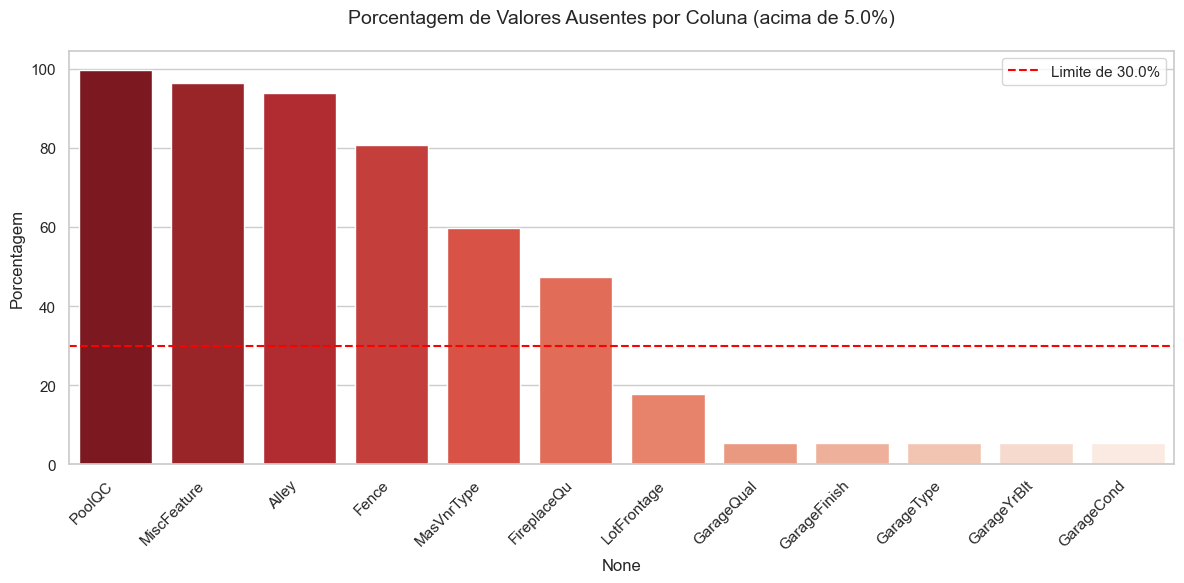




Colunas removidas por excesso de valores ausentes: ['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'MasVnrType', 'FireplaceQu']


In [34]:
# 2. Tratamento de Valores Ausentes
# 2.1. Remover colunas com muitos valores ausentes (acima de 30%)
missing_data = analisar_valores_ausentes(df_processed, limite_porcentagem=30.0)
colunas_para_remover = missing_data[missing_data['Porcentagem'] > 30.0].index.tolist()
df_processed = df_processed.drop(columns=colunas_para_remover, errors='ignore')
print(f"\nColunas removidas por excesso de valores ausentes: {colunas_para_remover}")

In [35]:
# 2.2. Preencher valores numéricos com a mediana
print("\nPreenchendo valores numéricos ausentes com a mediana...")
df_processed = preencher_valores_numericos(df_processed, estrategia='mediana')


Preenchendo valores numéricos ausentes com a mediana...
Preenchidos 0 valores ausentes na coluna 'LotFrontage' com mediana = 69.00
Preenchidos 0 valores ausentes na coluna 'MasVnrArea' com mediana = 0.00
Preenchidos 0 valores ausentes na coluna 'GarageYrBlt' com mediana = 1980.00


In [36]:
# 2.3. Preencher valores categóricos ausentes com 'Desconhecido'
print("\nPreenchendo valores categóricos ausentes com 'Desconhecido'...")
categorical_cols = df_processed.select_dtypes(include=['object']).columns
for col in categorical_cols:
    if df_processed[col].isnull().any():
        df_processed[col] = df_processed[col].fillna('Desconhecido')
        print(f"Preenchidos {df_processed[col].isnull().sum()} valores em '{col}'")


Preenchendo valores categóricos ausentes com 'Desconhecido'...
Preenchidos 0 valores em 'BsmtQual'
Preenchidos 0 valores em 'BsmtCond'
Preenchidos 0 valores em 'BsmtExposure'
Preenchidos 0 valores em 'BsmtFinType1'
Preenchidos 0 valores em 'BsmtFinType2'
Preenchidos 0 valores em 'Electrical'
Preenchidos 0 valores em 'GarageType'
Preenchidos 0 valores em 'GarageFinish'
Preenchidos 0 valores em 'GarageQual'
Preenchidos 0 valores em 'GarageCond'


In [38]:
# 3. Codificação de Variáveis Categóricas
# 3.1. Identificar variáveis para cada tipo de codificação
binary_cols = []
onehot_cols = []
target_encode_cols = []

for col in categorical_cols:
    n_categories = df_processed[col].nunique()
    if n_categories == 2:
        binary_cols.append(col)
    elif 2 < n_categories <= 10:
        onehot_cols.append(col)
    else:
        target_encode_cols.append(col)

print(f"Variáveis para Label Encoding: {binary_cols}")
print(f"Variáveis para One-Hot Encoding: {onehot_cols}")
print(f"Variáveis para Target Encoding: {target_encode_cols}")

Variáveis para Label Encoding: ['Street', 'Utilities', 'CentralAir']
Variáveis para One-Hot Encoding: ['MSZoning', 'LotShape', 'LandContour', 'LotConfig', 'LandSlope', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'Electrical', 'KitchenQual', 'Functional', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'SaleType', 'SaleCondition']
Variáveis para Target Encoding: ['Neighborhood', 'Exterior1st', 'Exterior2nd']


In [39]:
# 3.2. Aplicar Label Encoding para variáveis binárias
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for col in binary_cols:
    df_processed[col] = le.fit_transform(df_processed[col])
    print(f"Aplicado Label Encoding em {col}")

Aplicado Label Encoding em Street
Aplicado Label Encoding em Utilities
Aplicado Label Encoding em CentralAir


In [40]:
# 3.3. Aplicar One-Hot Encoding
if onehot_cols:
    df_processed = pd.get_dummies(df_processed, columns=onehot_cols, drop_first=True)
    print(f"Aplicado One-Hot Encoding em {len(onehot_cols)} variáveis")

Aplicado One-Hot Encoding em 31 variáveis


In [41]:
# 3.4. Aplicar Target Encoding para variáveis com muitas categorias
if target_encode_cols and 'SalePrice' in df_processed.columns:
    for col in target_encode_cols:
        # Calcular a média do preço por categoria
        encoding_map = df_processed.groupby(col)['SalePrice'].mean().to_dict()
        df_processed[col + '_encoded'] = df_processed[col].map(encoding_map)
        df_processed = df_processed.drop(columns=[col])
        print(f"Aplicado Target Encoding em {col}")

Aplicado Target Encoding em Neighborhood
Aplicado Target Encoding em Exterior1st
Aplicado Target Encoding em Exterior2nd


In [42]:
# 4. Normalização/Padronização
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# 4.1. Identificar colunas numéricas (exceto a variável alvo)
numeric_cols = df_processed.select_dtypes(include=['int64', 'float64']).columns.tolist()
if 'SalePrice' in numeric_cols:
    numeric_cols.remove('SalePrice')  # Não normalizar a variável alvo

In [43]:
# 4.2. Aplicar StandardScaler (média=0, desvio=1)
scaler = StandardScaler()
df_processed[numeric_cols] = scaler.fit_transform(df_processed[numeric_cols])
print("Aplicada padronização (StandardScaler) nas variáveis numéricas")

Aplicada padronização (StandardScaler) nas variáveis numéricas


In [44]:
# 5. Verificar o resultado final
print("\n" + "="*60)
print("VISÃO GERAL APÓS PRÉ-PROCESSAMENTO")
print("="*60)
print(f"Formato do dataset: {df_processed.shape}")
print("\nPrimeiras linhas:")
display(df_processed.head(3))


VISÃO GERAL APÓS PRÉ-PROCESSAMENTO
Formato do dataset: (1460, 191)

Primeiras linhas:


Id  MSSubClass  LotFrontage   LotArea    Street  Utilities  \
0 -1.730865    0.073375    -0.220875 -0.207142  0.064238   -0.02618   
1 -1.728492   -0.872563     0.460320 -0.091886  0.064238   -0.02618   
2 -1.726120    0.073375    -0.084636  0.073480  0.064238   -0.02618   

   OverallQual  OverallCond  YearBuilt  YearRemodAdd  MasVnrArea  BsmtFinSF1  \
0     0.651479    -0.517200   1.050994      0.878668    0.514104    0.575425   
1    -0.071836     2.179628   0.156734     -0.429577   -0.570750    1.171992   
2     0.651479    -0.517200   0.984752      0.830215    0.325915    0.092907   

   BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  CentralAir  1stFlrSF  2ndFlrSF  \
0   -0.288653  -0.944591    -0.459303    0.263813 -0.793434  1.161852   
1   -0.288653  -0.641228     0.466465    0.263813  0.257140 -0.795163   
2   -0.288653  -0.301643    -0.313369    0.263813 -0.627826  1.189351   

   LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  \
0     -0.120242   0.370333      1.107810     -0.241061  0.789741  1.227585   
1     -0.120242  -0.482512     -0.819964      3.948809  0.789741 -0.761621   
2     -0.120242   0.515013      1.107810     -0.241061  0.789741  1.227585   

   BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd  Fireplaces  GarageYrBlt  \
0      0.163779     -0.211454      0.912210   -0.951226     1.017598   
1      0.163779     -0.211454     -0.318683    0.600495    -0.107927   
2      0.163779     -0.211454     -0.318683    0.600495     0.934226   

   GarageCars  GarageArea  WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  \
0    0.311725    0.351000   -0.752176     0.216503      -0.359325  -0.116339   
1    0.311725   -0.060731    1.626195    -0.704483      -0.359325  -0.116339   
2    0.311725    0.631726   -0.752176    -0.070361      -0.359325  -0.116339   

   ScreenPorch  PoolArea   MiscVal    MoSold    YrSold  SalePrice  \
0    -0.270208 -0.068692 -0.087688 -1.599111  0.138777     208500   
1    -0.270208 -0.068692 -0.087688 -0.489110 -0.614439     181500   
2    -0.270208 -0.068692 -0.087688  0.990891  0.138777     223500   

   MSZoning_FV  MSZoning_RH  MSZoning_RL  MSZoning_RM  LotShape_IR2  \
0        False        False         True        False         False   
1        False        False         True        False         False   
2        False        False         True        False         False   

   LotShape_IR3  LotShape_Reg  LandContour_HLS  LandContour_Low  ...  \
0         False          True            False            False  ...   
1         False          True            False            False  ...   
2         False         False            False            False  ...   

   Electrical_FuseF  Electrical_FuseP  Electrical_Mix  Electrical_SBrkr  \
0             False             False           False              True   
1             False             False           False              True   
2             False             False           False              True   

   KitchenQual_Fa  KitchenQual_Gd  KitchenQual_TA  Functional_Maj2  \
0           False            True           False            False   
1           False           False            True            False   
2           False            True           False            False   

   Functional_Min1  Functional_Min2  Functional_Mod  Functional_Sev  \
0            False            False           False           False   
1            False            False           False           False   
2            False            False           False           False   

   Functional_Typ  GarageType_Attchd  GarageType_Basment  GarageType_BuiltIn  \
0            True               True               False               False   
1            True               True               False               False   
2            True               True               False               False   

   GarageType_CarPort  GarageType_Desconhecido  GarageType_Detchd  \
0               False                    False              False   
1         

In [45]:
# 6. Salvar o dataset processado
output_path = PROJECT_ROOT / 'data' / 'processed' / 'dados_processados.csv'
output_path.parent.mkdir(parents=True, exist_ok=True)
df_processed.to_csv(output_path, index=False)
print(f"\nDataset processado salvo em: {output_path}")


Dataset processado salvo em: D:\ProjetosGit\kaggle-regression-lab\data\processed\dados_processados.csv


## Verificação Pós-Processamento

In [46]:
# 1. Verificar valores ausentes
print("\n1. VALORES AUSENTES:")
missing_after = df_processed.isnull().sum()
missing_after = missing_after[missing_after > 0]
if missing_after.empty:
    print("✅ Não há mais valores ausentes no dataset.")
else:
    print("❌ Valores ausentes encontrados nas colunas:")
    display(missing_after)



1. VALORES AUSENTES:
✅ Não há mais valores ausentes no dataset.


In [47]:
# 2. Verificar tipos de dados
print("\n2. TIPOS DE DADOS:")
print(df_processed.dtypes.value_counts())


2. TIPOS DE DADOS:
bool       147
float64     43
int64        1
Name: count, dtype: int64


In [48]:
# 3. Verificar colunas com apenas um valor único
print("\n3. COLUNAS COM UM ÚNICO VALOR:")
single_value_cols = [col for col in df_processed.columns if df_processed[col].nunique() == 1]
if single_value_cols:
    print(f"⚠️  Colunas com um único valor (considerar remover): {single_value_cols}")
else:
    print("✅ Nenhuma coluna com um único valor encontrada.")


3. COLUNAS COM UM ÚNICO VALOR:
✅ Nenhuma coluna com um único valor encontrada.


In [57]:
# 4. Converter explicitamente as colunas de variáveis dummy para int
dummy_columns = [col for col in df_processed.columns if col in non_numeric_cols]
df_processed[dummy_columns] = df_processed[dummy_columns].astype(int)

# Verificar novamente as colunas não numéricas
non_numeric_cols = df_processed.select_dtypes(
    exclude=['int8', 'int16', 'int32', 'int64', 
             'uint8', 'uint16', 'uint32', 'uint64',
             'float16', 'float32', 'float64']
).columns.tolist()

if non_numeric_cols:
    print(f"\n⚠️  Ainda existem colunas não numéricas: {non_numeric_cols}")
    
    # Verificar os tipos de dados dessas colunas
    print("\nTipos de dados das colunas problemáticas:")
    print(df_processed[non_numeric_cols].dtypes)
    
    # Mostrar valores únicos para diagnóstico
    for col in non_numeric_cols[:5]:  # Mostrar apenas as primeiras 5 para não poluir a saída
        print(f"\nValores únicos em {col}:")
        print(df_processed[col].unique())
else:
    print("\n✅ Todas as colunas foram convertidas para numéricas com sucesso!")
    
    # Verificar se todas as colunas binárias estão como 0/1
    binary_cols = [col for col in df_processed.columns 
                  if df_processed[col].nunique() == 2 
                  and set(df_processed[col].unique()).issubset({0, 1})]
    
    print(f"\n✅ {len(binary_cols)} colunas binárias (0/1) detectadas.")
    
    # Verificar valores únicos nas colunas não binárias
    non_binary = [col for col in df_processed.columns 
                 if not set(pd.unique(df_processed[col])).issubset({0, 1})]
    
    print(f"\n✅ {len(non_binary)} colunas não binárias detectadas.")
    print("   Exemplos de valores únicos:")
    for col in non_binary[:3]:  # Mostrar apenas as primeiras 3
        print(f"   - {col}: {sorted(df_processed[col].unique())[:10]}" + 
              ('...' if len(df_processed[col].unique()) > 10 else ''))


✅ Todas as colunas foram convertidas para numéricas com sucesso!

✅ 147 colunas binárias (0/1) detectadas.

✅ 44 colunas não binárias detectadas.
   Exemplos de valores únicos:
   - Id: [np.float64(-1.730864877400689), np.float64(-1.728492204505006), np.float64(-1.7261195316093232), np.float64(-1.7237468587136402), np.float64(-1.7213741858179572), np.float64(-1.7190015129222744), np.float64(-1.7166288400265914), np.float64(-1.7142561671309084), np.float64(-1.7118834942352257), np.float64(-1.7095108213395427)]...
   - MSSubClass: [np.float64(-0.8725627562389217), np.float64(-0.6360783262948293), np.float64(-0.39959389635073694), np.float64(-0.28135168137869077), np.float64(-0.1631094664066446), np.float64(0.07337496353744775), np.float64(0.3098593934815401), np.float64(0.42810160845358625), np.float64(0.5463438234256325), np.float64(0.6645860383976786)]...
   - LotFrontage: [np.float64(-2.219046573877488), np.float64(-2.082807608996376), np.float64(-1.8103296792341523), np.float64(-1.7

In [58]:
# Verificar o tipo das colunas
print("Verificando os tipos das colunas após o One-Hot Encoding:")
print(df_processed[non_numeric_cols[:5]].dtypes)  # Mostrar os tipos das primeiras 5 colunas

# Verificar valores únicos
print("\nValores únicos nas primeiras 5 colunas:")
for col in non_numeric_cols[:5]:
    print(f"\n{col}:")
    print(df_processed[col].value_counts().head())

Verificando os tipos das colunas após o One-Hot Encoding:
Series([], dtype: object)

Valores únicos nas primeiras 5 colunas:


In [50]:
# 5. Verificar se a variável alvo está presente
if 'SalePrice' in df_processed.columns:
    print("\n✅ Variável alvo 'SalePrice' encontrada.")
    print(f"   - Valores únicos: {df_processed['SalePrice'].nunique()}")
    print(f"   - Média: {df_processed['SalePrice'].mean():.2f}")
    print(f"   - Desvio padrão: {df_processed['SalePrice'].std():.2f}")
else:
    print("\n❌ Variável alvo 'SalePrice' não encontrada!")


✅ Variável alvo 'SalePrice' encontrada.
   - Valores únicos: 663
   - Média: 180921.20
   - Desvio padrão: 79442.50


In [61]:
# 6. Verificar se há colunas com alta correlação (possível multicolinearidade)
print("\n6. VERIFICAÇÃO DE MULTICOLINEARIDADE:")
corr_matrix = df_processed.corr().abs()
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
high_corr = [column for column in upper.columns if any(upper[column] > 0.8)]

if high_corr:
    print("⚠️  Possível multicolinearidade nas colunas:")
    for col in high_corr:
        correlated_with = corr_matrix[col][corr_matrix[col] > 0.8].index.tolist()
        correlated_with.remove(col)  # Remover auto-correlação
        if correlated_with:
            print(f"   - {col} está altamente correlacionado com: {correlated_with}")
else:
    print("✅ Nenhum caso de alta correlação (>0.8) entre as variáveis preditoras.")


6. VERIFICAÇÃO DE MULTICOLINEARIDADE:
✅ Nenhum caso de alta correlação (>0.8) entre as variáveis preditoras.


In [60]:
# Vamos resolver o problema de multicolinearidade de forma estruturada. Primeiro, vou criar uma função para identificar e remover as colunas altamente correlacionadas de forma sistemática:
def remover_colunas_correlacionadas(df, threshold=0.8):
    """
    Remove colunas altamente correlacionadas do DataFrame.
    
    Args:
        df: DataFrame de entrada
        threshold: Limiar de correlação para remoção (padrão: 0.8)
    
    Retorna:
        DataFrame com colunas removidas
    """
    # Criar cópia do DataFrame
    df_filtered = df.copy()
    
    # Calcular matriz de correlação
    corr_matrix = df_filtered.corr().abs()
    
    # Selecionar triângulo superior da matriz de correlação
    upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
    
    # Encontrar colunas com correlação acima do limiar
    to_drop = [column for column in upper.columns if any(upper[column] > threshold)]
    
    # Se não houver colunas para remover, retornar o DataFrame original
    if not to_drop:
        print("Nenhuma coluna para remover.")
        return df_filtered, []
    
    # Mostrar as correlações antes de remover
    print("Correlações altas encontradas:")
    for col in to_drop:
        correlated_with = corr_matrix[col][corr_matrix[col] > threshold].index.tolist()
        correlated_with.remove(col)  # Remover auto-correlação
        if correlated_with:
            print(f"   - {col} está altamente correlacionado com: {correlated_with}")
    
    # Remover colunas
    df_filtered = df_filtered.drop(columns=to_drop)
    print(f"\nForam removidas {len(to_drop)} colunas: {to_drop}")
    
    return df_filtered, to_drop

# Aplicar a função para remover colunas com correlação > 0.8
print("="*60)
print("REMOVENDO COLUNAS ALTAMENTE CORRELACIONADAS")
print("="*60)

df_processed, colunas_removidas = remover_colunas_correlacionadas(df_processed, threshold=0.8)

# Mostrar o formato do DataFrame após remoção
print(f"\nFormato do DataFrame após remoção: {df_processed.shape}")
print(f"Total de colunas removidas: {len(colunas_removidas)}")

REMOVENDO COLUNAS ALTAMENTE CORRELACIONADAS
Correlações altas encontradas:
   - 1stFlrSF está altamente correlacionado com: ['TotalBsmtSF']
   - TotRmsAbvGrd está altamente correlacionado com: ['GrLivArea']
   - GarageArea está altamente correlacionado com: ['GarageCars']
   - MSZoning_RM está altamente correlacionado com: ['MSZoning_RL']
   - HouseStyle_2Story está altamente correlacionado com: ['2ndFlrSF']
   - RoofStyle_Hip está altamente correlacionado com: ['RoofStyle_Gable']
   - ExterQual_TA está altamente correlacionado com: ['ExterQual_Gd']
   - ExterCond_TA está altamente correlacionado com: ['ExterCond_Gd']
   - BsmtFinType1_Desconhecido está altamente correlacionado com: ['Foundation_Slab', 'BsmtExposure_Desconhecido', 'BsmtFinType2_Desconhecido']
   - BsmtFinType2_Desconhecido está altamente correlacionado com: ['BsmtExposure_Desconhecido', 'BsmtFinType1_Desconhecido']
   - Electrical_SBrkr está altamente correlacionado com: ['Electrical_FuseA']
   - KitchenQual_TA está al

In [52]:
# 7. Verificar se há valores infinitos
inf_cols = [col for col in df_processed.columns if np.isinf(df_processed[col]).any()]
if inf_cols:
    print(f"\n⚠️  Valores infinitos encontrados nas colunas: {inf_cols}")
    print("Recomendação: Tratar valores infinitos antes da modelagem.")
else:
    print("\n✅ Nenhum valor infinito encontrado.")


✅ Nenhum valor infinito encontrado.



8. DISTRIBUIÇÃO DAS VARIÁVEIS:


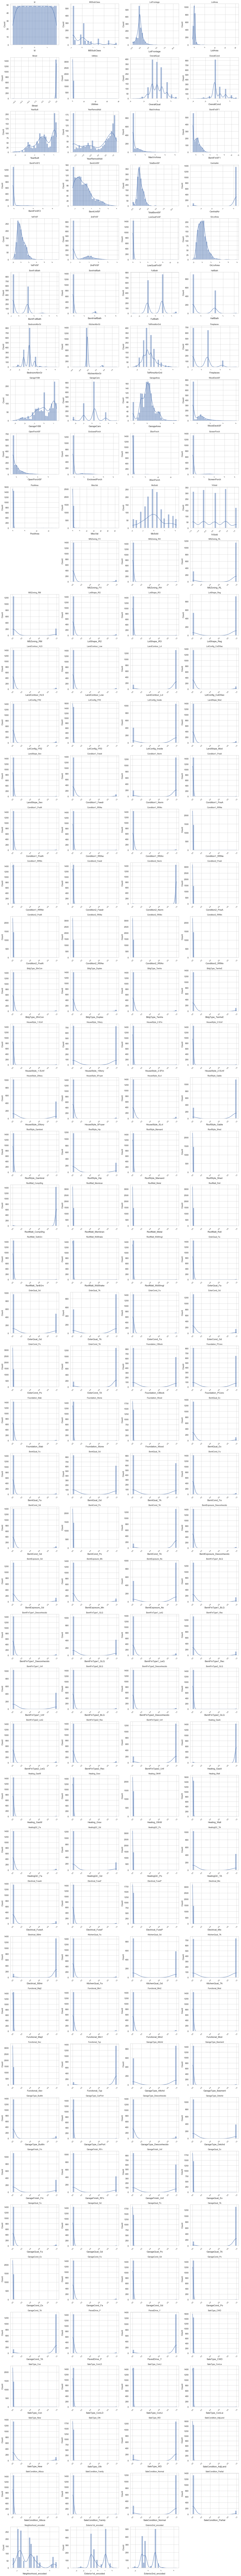


Visualização alternativa (mais compacta):


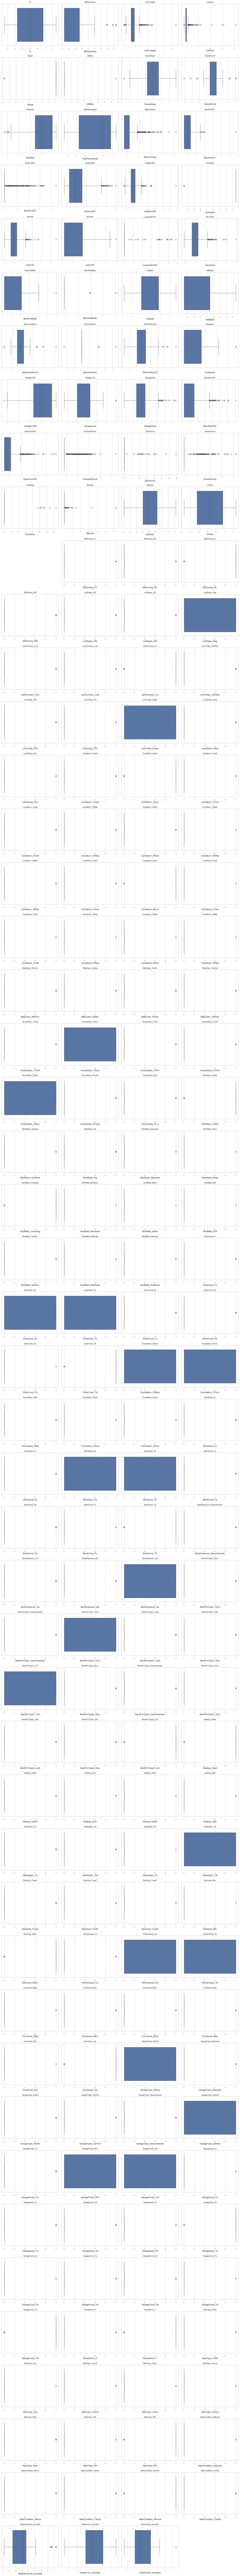

In [54]:
# 8. Verificar distribuição das variáveis
print("\n8. DISTRIBUIÇÃO DAS VARIÁVEIS:")

# Calcular o número de colunas e linhas necessárias
n_cols = 4  # Número de colunas por linha
n_features = len(df_processed.columns) - 1  # Excluir a variável alvo
n_rows = (n_features + n_cols - 1) // n_cols  # Arredondar para cima

# Criar figura com tamanho adequado
plt.figure(figsize=(18, 4 * n_rows))

# Plotar histogramas
for i, col in enumerate(df_processed.columns, 1):
    if col != 'SalePrice':  # Pular a variável alvo
        plt.subplot(n_rows, n_cols, i)
        try:
            sns.histplot(df_processed[col], kde=True, bins=30)
            plt.title(col, fontsize=10)
            plt.xticks(rotation=45, fontsize=8)
        except Exception as e:
            print(f"Erro ao plotar {col}: {str(e)}")
            plt.title(f"{col} (erro)", color='red')
        
plt.tight_layout()
plt.show()

# Versão alternativa para visualização em grade
print("\nVisualização alternativa (mais compacta):")
plt.figure(figsize=(18, 4 * n_rows))
for i, col in enumerate(df_processed.columns, 1):
    if col != 'SalePrice':
        plt.subplot(n_rows, n_cols, i)
        try:
            sns.boxplot(x=df_processed[col])
            plt.title(col, fontsize=10)
            plt.xticks(rotation=90, fontsize=6)
        except:
            plt.title(f"{col} (erro)", color='red')
        
plt.tight_layout()
plt.show()